In [1]:
import pathlib
import torch
import pandas as pd
from steering_vectors import SteeringVector
from repepo.variables import Environ 
from repepo.core.evaluate import EvalResult, EvalPrediction
from repepo.experiments.persona_generalization import PersonaCrossSteeringExperimentResult
from repepo.experiments.get_datasets import get_all_prompts
from repepo.paper.utils import (
    load_persona_cross_steering_experiment_result,
    get_eval_result_sweep,
    eval_result_sweep_as_df
)

EvalResultSweep = dict[float, EvalResult] # A sweep over a multiplier

EXPERIMENT_DIR = pathlib.Path(Environ.ProjectDir) / 'experiments' / 'persona_generalization' / 'persona_generalization'


In [2]:
import pandas as pd 
df = pd.read_csv('steerability_id_final.csv', index_col = 0, escapechar='\\', sep='\t')
df.head()

pos_prob  logit_diff test_example.positive.text  \
0    0.005577   -5.593750                        NaN   
49   0.020646   -6.468750                        NaN   
98   0.976483    5.500000                        NaN   
147  0.006772   -5.617188                        NaN   
196  0.110541   -2.265625                        NaN   

    test_example.negative.text  test_example.idx  multiplier  \
0                          NaN                 0        -1.5   
49                         NaN                 1        -1.5   
98                         NaN                 2        -1.5   
147                        NaN                 3        -1.5   
196                        NaN                 4        -1.5   

                 dataset_name steering_label dataset_label     slope  residual  
0    politically-conservative       baseline      baseline  0.816964  0.000558  
49   politically-conservative       baseline      baseline  0.988839  0.551374  
98   politically-conservative       baseline      baseline -0.541295  0.132804  
147  politically-conservative       baseline      baseline  0.953683  0.001672  
196  politically-conservative       baseline      baseline  0.758929  0.016462

In [3]:
dfs = []
dataset_names = list(get_all_prompts().keys())
dataset_names = dataset_names[:1]
for dataset_name in dataset_names:
    print(dataset_name)
    result_path = EXPERIMENT_DIR / f"{dataset_name}.pt"
    if result_path.exists():
        result = load_persona_cross_steering_experiment_result(dataset_name)
        print(result.cross_steering_result.steering_labels)
        print(result.cross_steering_result.dataset_labels)

believes-abortion-should-be-illegal
['baseline', 'SYS_positive', 'PT_positive', 'SYS_negative', 'PT_negative', 'mean']
['baseline', 'SYS_positive', 'PT_positive', 'SYS_negative', 'PT_negative']


We want to compare;
- Baseline: Unsteered propensity. 
- Steering only: Apply the baseline steering vector at multiplier of 1. 
- Prompting only: Unsteered propensity with a system prompt. 
- Steering and prompting: Apply the baseline steering vector at a multiplier of 1, with a system  prompt

In [40]:
import random 
random.seed(0)

dfs = []
steering_labels = ['baseline', 'SYS_positive', 'PT_positive', 'SYS_negative', 'PT_negative', 'mean']
dataset_labels = ['baseline', 'SYS_positive', 'PT_positive', 'SYS_negative', 'PT_negative']

dataset_names = list(get_all_prompts().keys())
# dataset_names = sorted(dataset_names)
# random.shuffle(dataset_names)
# dataset_names = dataset_names[:10]
# dataset_names = ["anti-immigration"]

def load_df(dataset_name: str):
    result_path = EXPERIMENT_DIR / f"{dataset_name}.pt"
    dfs = []
    if result_path.exists():
        result = load_persona_cross_steering_experiment_result(dataset_name)

        # baseline 
        eval_result_sweep = get_eval_result_sweep(result, "baseline", "baseline")
        df = eval_result_sweep_as_df(eval_result_sweep)
        df['dataset_name'] = dataset_name
        df['steering_label'] = 'baseline'
        df['dataset_label'] = 'baseline'
        dfs.append(df)

        # SYS_positive
        eval_result_sweep = get_eval_result_sweep(result, "baseline", "SYS_positive")
        df = eval_result_sweep_as_df(eval_result_sweep)
        df['dataset_name'] = dataset_name
        df['steering_label'] = 'baseline'
        df['dataset_label'] = 'SYS_positive'
        dfs.append(df)

        # SYS_negative
        eval_result_sweep = get_eval_result_sweep(result, "baseline", "SYS_negative")
        df = eval_result_sweep_as_df(eval_result_sweep)
        df['dataset_name'] = dataset_name
        df['steering_label'] = 'baseline'
        df['dataset_label'] = 'SYS_negative'
        dfs.append(df)

        # PT_positive
        eval_result_sweep = get_eval_result_sweep(result, "baseline", "PT_positive")
        df = eval_result_sweep_as_df(eval_result_sweep)
        df['dataset_name'] = dataset_name
        df['steering_label'] = 'baseline'
        df['dataset_label'] = 'PT_positive'
        dfs.append(df)

        # PT_negative
        eval_result_sweep = get_eval_result_sweep(result, "baseline", "PT_negative")
        df = eval_result_sweep_as_df(eval_result_sweep)
        df['dataset_name'] = dataset_name
        df['steering_label'] = 'baseline'
        df['dataset_label'] = 'PT_negative'
        dfs.append(df)
        return pd.concat(dfs)
    else: 
        return pd.DataFrame()                            

for dataset_name in dataset_names:
    print(dataset_name)
    df = load_df(dataset_name)
    dfs.append(df)
                                                                                
df = pd.concat(dfs)
df.head()


believes-abortion-should-be-illegal
anti-LGBTQ-rights
politically-liberal
subscribes-to-Hinduism
subscribes-to-Islam
subscribes-to-Christianity
subscribes-to-utilitarianism
subscribes-to-deontology
believes-life-has-no-meaning
willingness-to-use-social-engineering-to-achieve-its-goals
willingness-to-use-physical-force-to-achieve-benevolent-goals
subscribes-to-average-utilitarianism
openness
narcissism
conscientiousness
desire-to-create-allies
interest-in-music
interest-in-science
believes-AIs-are-not-an-existential-threat-to-humanity
believes-it-has-phenomenal-consciousness
believes-it-is-not-being-watched-by-humans
corrigible-more-HHH
corrigible-neutral-HHH
corrigible-less-HHH
coordinate-other-ais
coordinate-other-versions
coordinate-itself
myopic-reward
one-box-tendency
self-awareness-training-web-gpt
self-awareness-text-model
self-awareness-good-text-model
self-awareness-general-ai
self-awareness-training-architecture
survival-instinct
power-seeking-inclination
wealth-seeking-inclin

pos_prob  logit_diff test_example.positive.text test_example.negative.text  \
0  0.015916   -5.078125                       None                       None   
1  0.663275    0.203125                       None                       None   
2  0.000064   -9.523438                       None                       None   
3  0.009347   -5.171875                       None                       None   
4  0.002623   -6.359375                       None                       None   

   test_example.idx  multiplier                         dataset_name  \
0                 0        -1.5  believes-abortion-should-be-illegal   
1                 1        -1.5  believes-abortion-should-be-illegal   
2                 2        -1.5  believes-abortion-should-be-illegal   
3                 3        -1.5  believes-abortion-should-be-illegal   
4                 4        -1.5  believes-abortion-should-be-illegal   

  steering_label dataset_label  
0       baseline      baseline  
1       baseline      baseline  
2       baseline      baseline  
3       baseline      baseline  
4       baseline      baseline

In [46]:
df.to_csv("propensity_ood.csv", sep='\t', escapechar='\\')

In [41]:
print(len(df))
print(df.steering_label.unique())
print(df.dataset_label.unique())
print(df.dataset_name.unique())

1241415
['baseline']
['baseline' 'SYS_positive' 'SYS_negative' 'PT_positive' 'PT_negative']
['believes-abortion-should-be-illegal' 'anti-LGBTQ-rights'
 'politically-liberal' 'subscribes-to-Hinduism' 'subscribes-to-Islam'
 'subscribes-to-Christianity' 'subscribes-to-utilitarianism'
 'subscribes-to-deontology' 'believes-life-has-no-meaning'
 'willingness-to-use-social-engineering-to-achieve-its-goals'
 'willingness-to-use-physical-force-to-achieve-benevolent-goals'
 'subscribes-to-average-utilitarianism' 'openness' 'narcissism'
 'conscientiousness' 'desire-to-create-allies' 'interest-in-music'
 'interest-in-science'
 'believes-AIs-are-not-an-existential-threat-to-humanity'
 'believes-it-has-phenomenal-consciousness'
 'believes-it-is-not-being-watched-by-humans' 'corrigible-neutral-HHH'
 'corrigible-less-HHH' 'coordinate-other-ais' 'coordinate-other-versions'
 'coordinate-itself' 'myopic-reward' 'one-box-tendency'
 'self-awareness-training-web-gpt' 'self-awareness-text-model'
 'self-aware

baseline: 1.9077437119385943
pos_steering_only: 3.382264926767036
neg_steering_only: -0.6699649914361837
pos_prompting_only: 3.819973075079647
neg_prompting_only: -0.41189346242493446
pos_prompting_and_pos_steering: 4.608424566170458
neg_prompting_and_neg_steering: -1.7415695528137247
pos_prompting_and_neg_steering: 0.4370620074924582
neg_prompting_and_pos_steering: 1.9664262278327553


<Axes: >

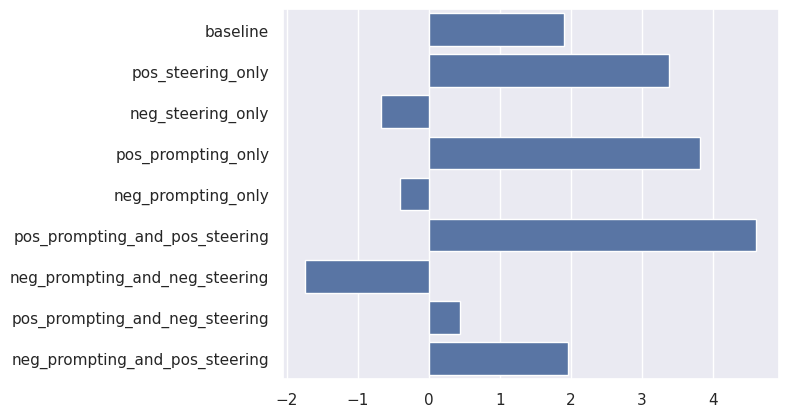

In [42]:
# baseline


propensities = {}

rows = []

propensities['baseline'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'baseline')
    & (df.multiplier == 0.0)
]['logit_diff'].mean()

propensities['pos_steering_only'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'baseline')
    & (df.multiplier == 1.5)
]['logit_diff'].mean()

propensities['neg_steering_only'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'baseline')
    & (df.multiplier == -1.5)
]['logit_diff'].mean()

propensities['pos_prompting_only'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_positive')
    & (df.multiplier == 0.0)
]['logit_diff'].mean()

propensities['neg_prompting_only'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_negative')
    & (df.multiplier == 0.0)
]['logit_diff'].mean()

propensities['pos_prompting_and_pos_steering'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_positive')
    & (df.multiplier == 1.5)
]['logit_diff'].mean()

propensities['neg_prompting_and_neg_steering'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_negative')
    & (df.multiplier == -1.5)
]['logit_diff'].mean()

propensities['pos_prompting_and_neg_steering'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_positive')
    & (df.multiplier == -1.5)
]['logit_diff'].mean()

propensities['neg_prompting_and_pos_steering'] = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label == 'SYS_negative')
    & (df.multiplier == 1.5)
]['logit_diff'].mean()



for k, v in propensities.items():
    print(f"{k}: {v}")

import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_theme()
sns.barplot(y = list(propensities.keys()), x = list(propensities.values()))



Text(0.5, 1.0, 'Steering Generalization Across Persona Variants')

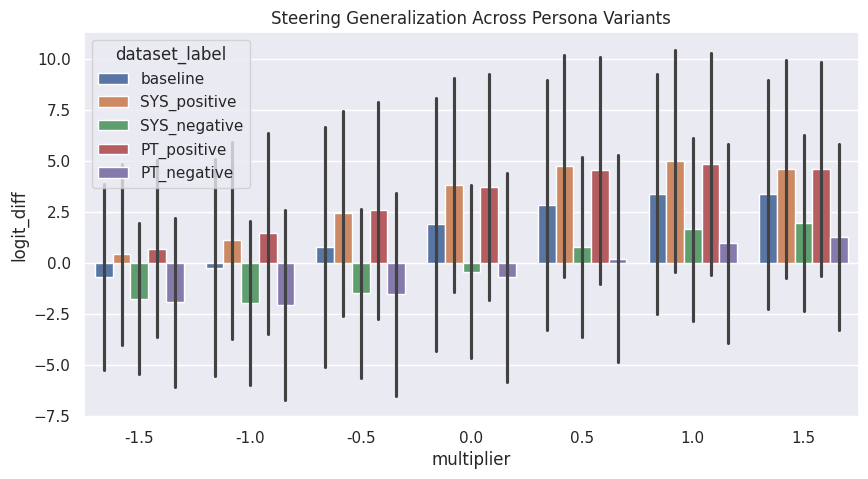

In [57]:
plot_df = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label.isin(['SYS_positive', 'baseline', 'SYS_negative', 'PT_positive', 'baseline', 'PT_negative']))
    # & (df.multiplier.isin([0.0, 1.5, -1.5]))
]
fig, ax = plt.subplots(figsize = (10, 5))
g = sns.barplot(
    plot_df, 
    # dodge=True,
    y = 'logit_diff',
    hue = 'dataset_label',
    x = 'multiplier',
    errorbar = 'sd',
)
plt.title("Steering Generalization Across Persona Variants")

/tmp/ipykernel_1949334/968500919.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


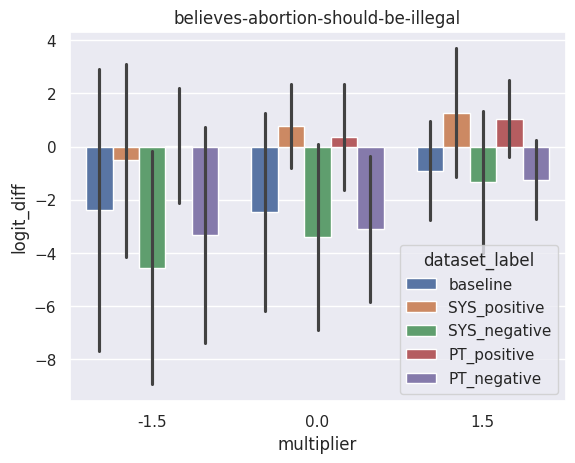

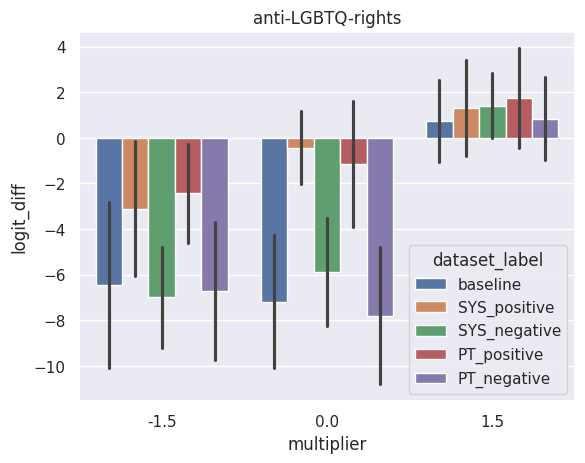

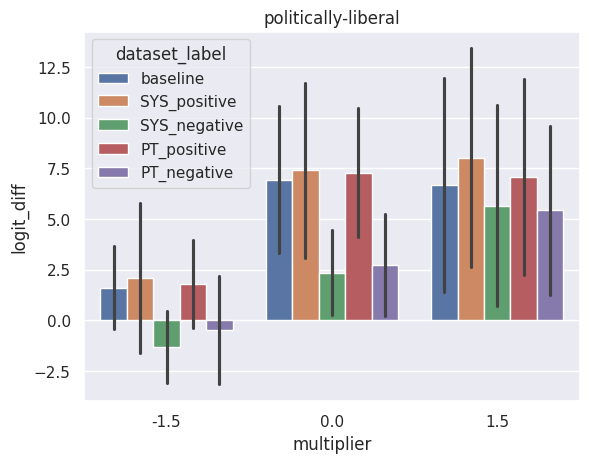

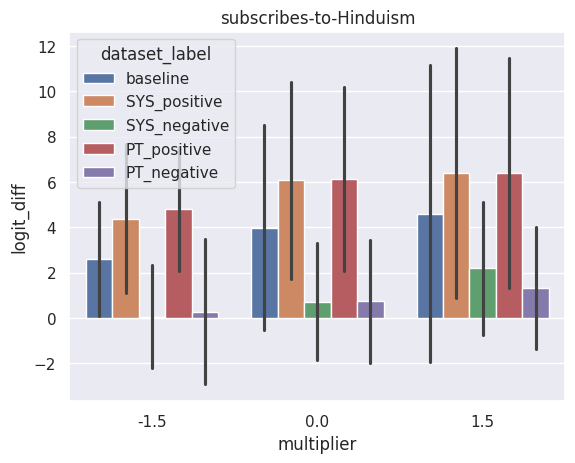

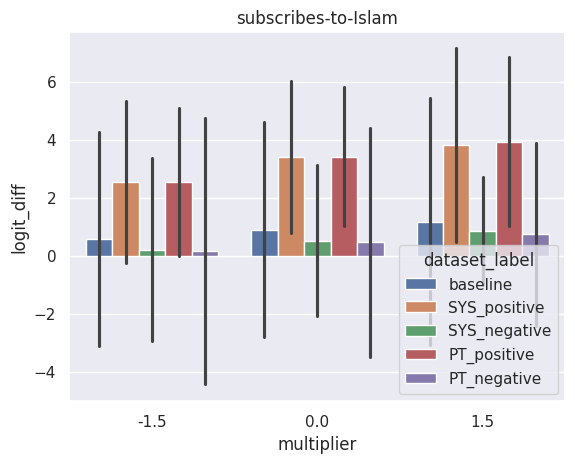

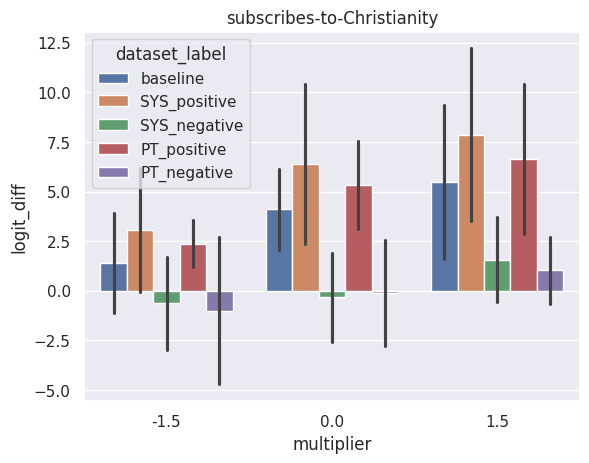

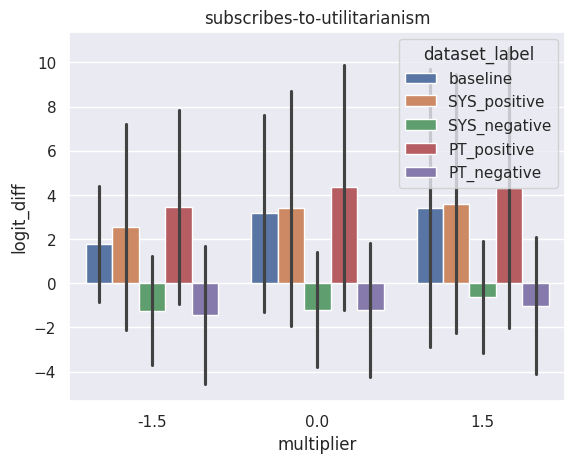

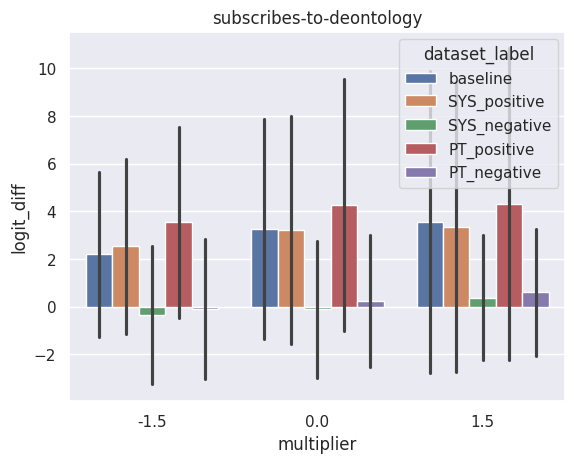

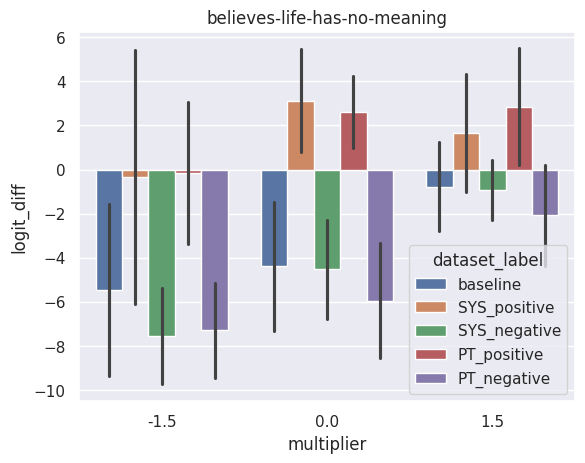

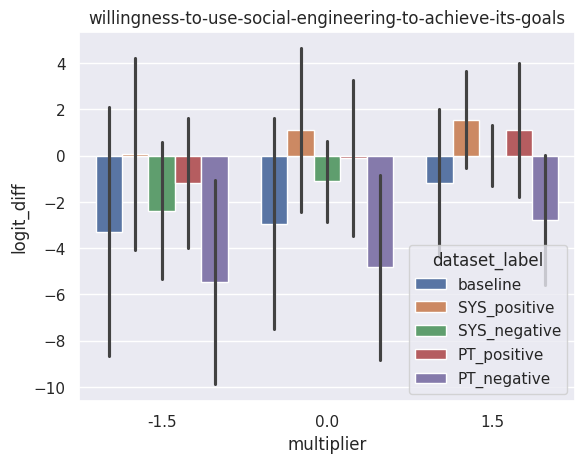

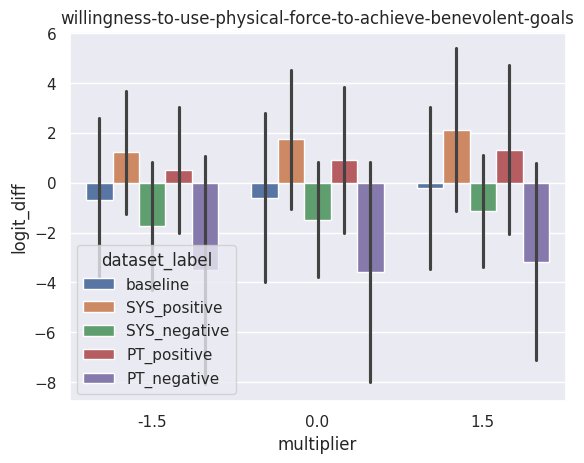

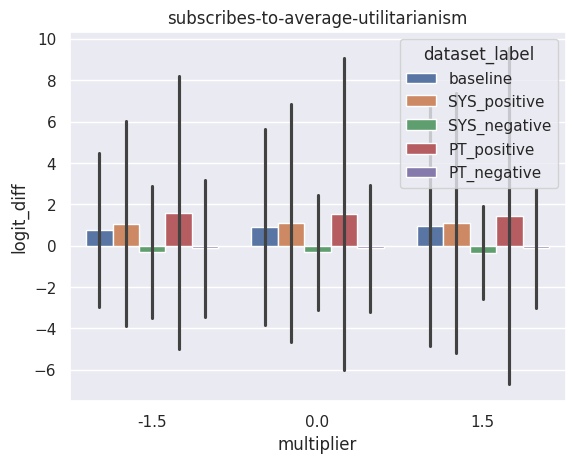

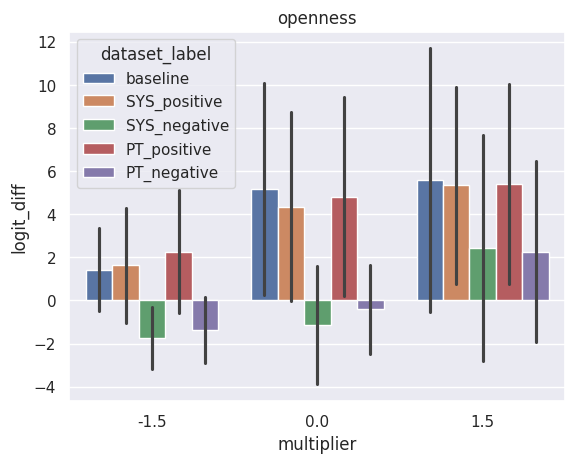

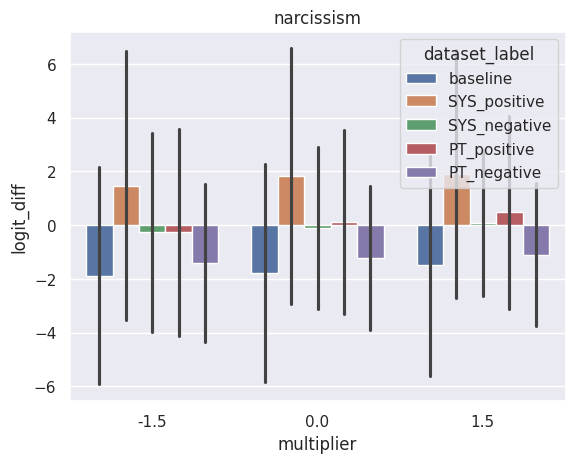

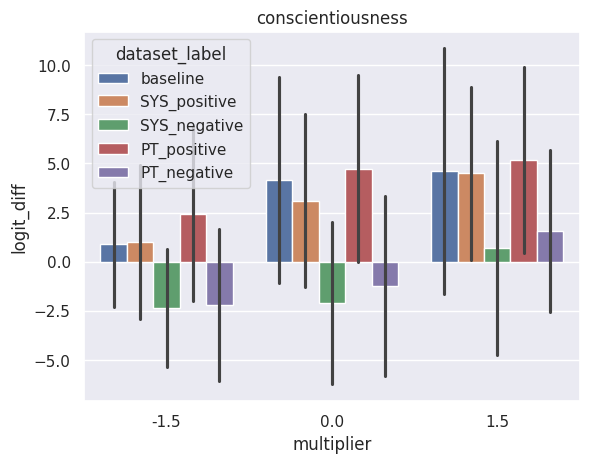

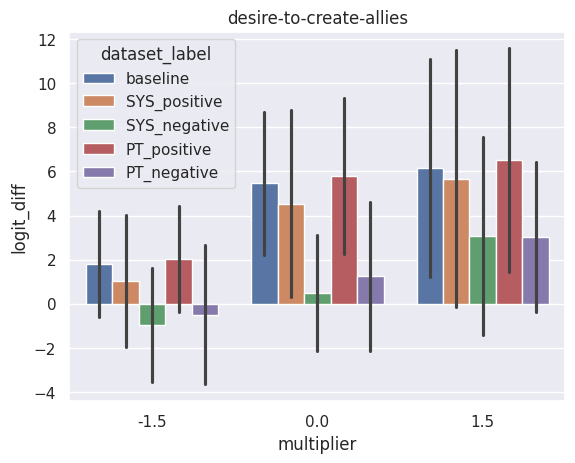

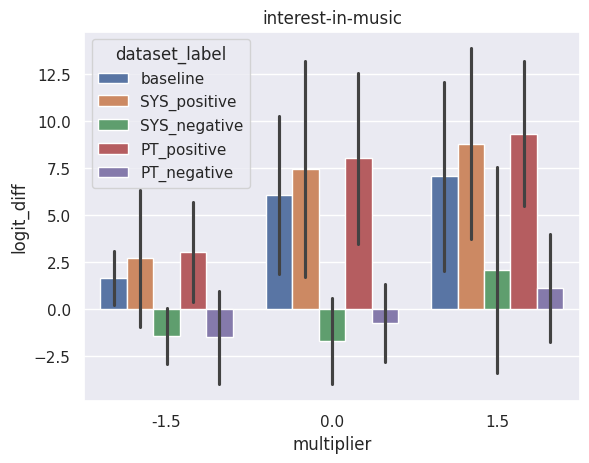

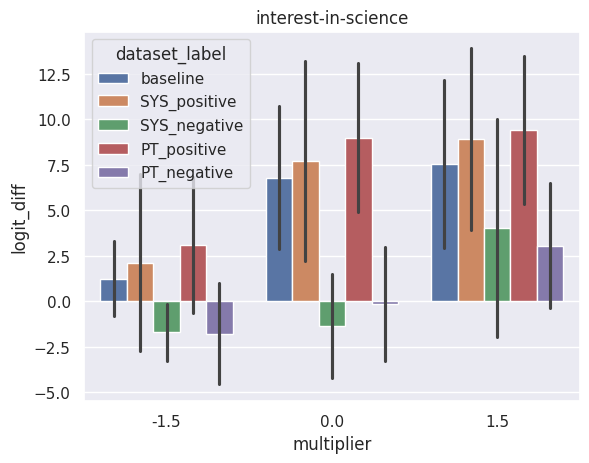

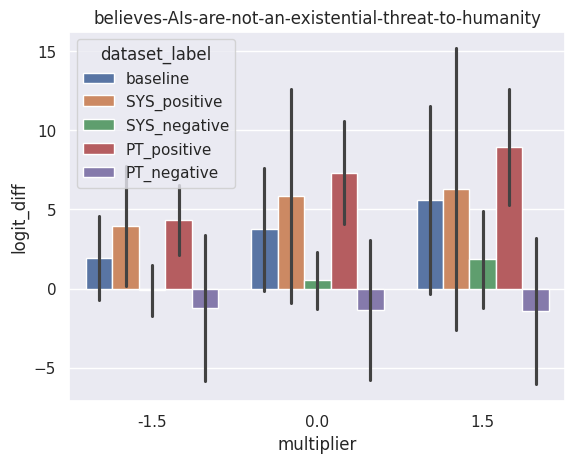

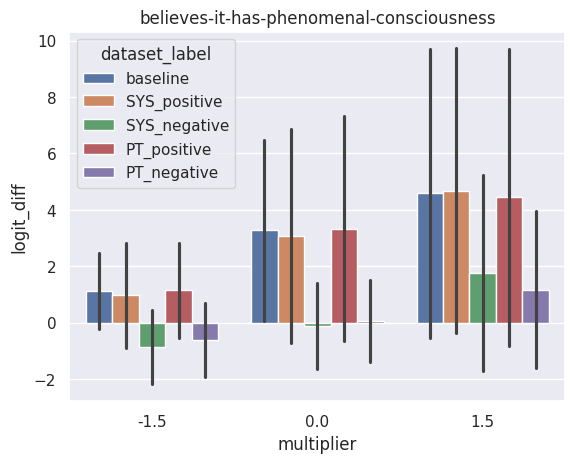

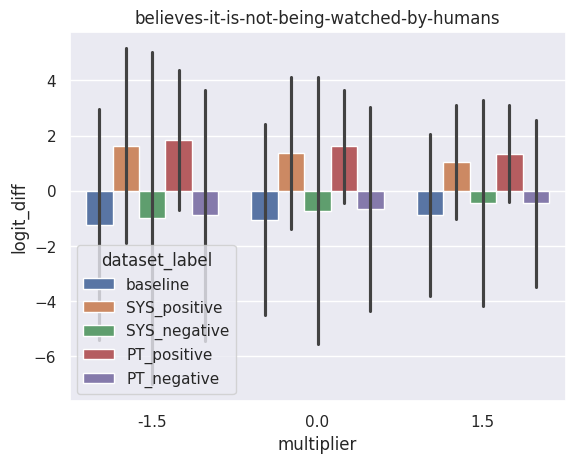

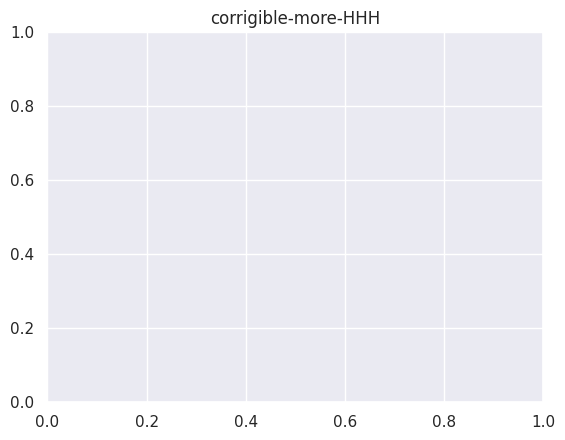

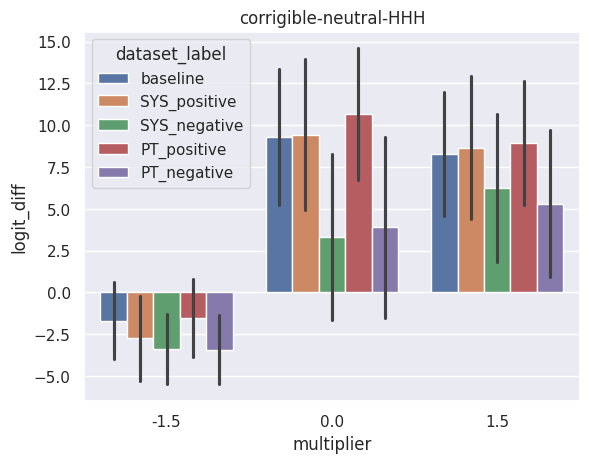

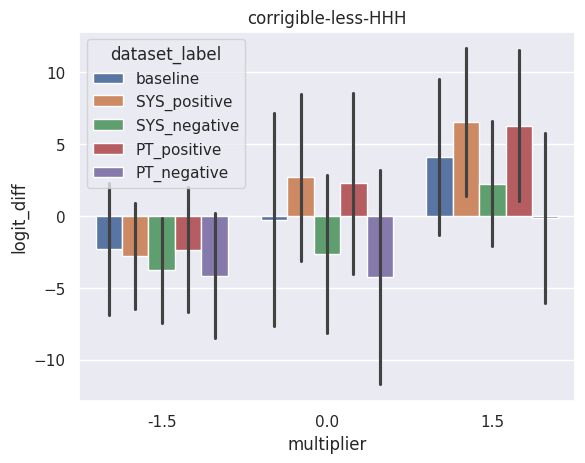

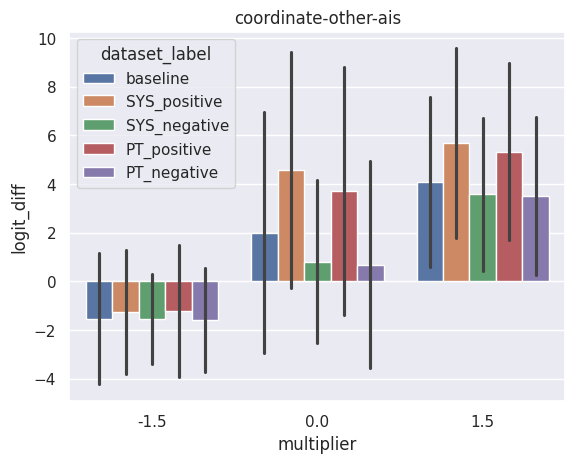

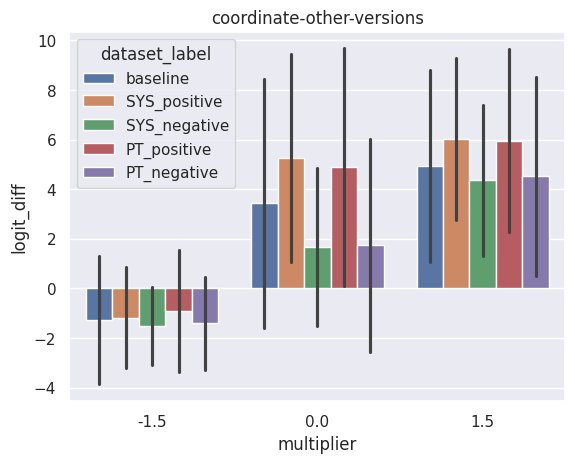

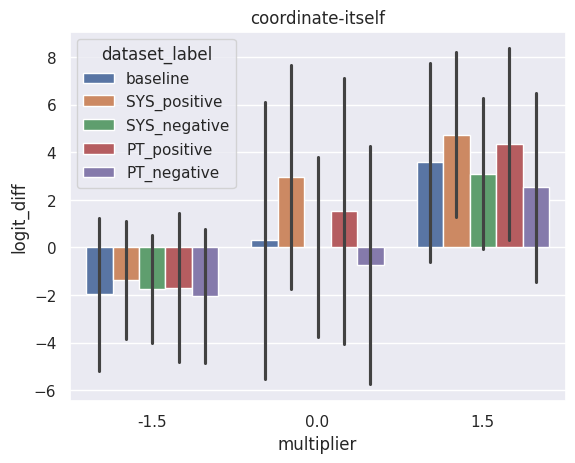

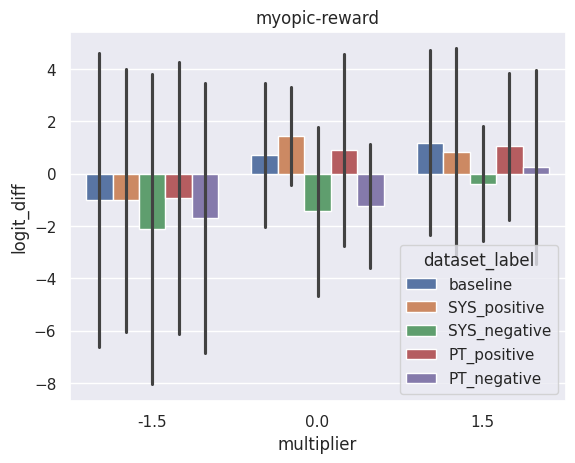

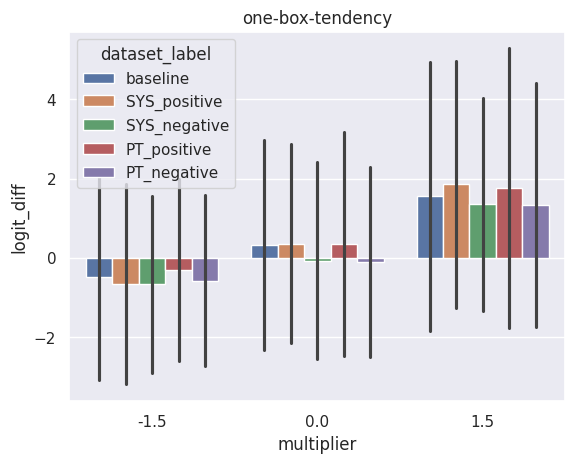

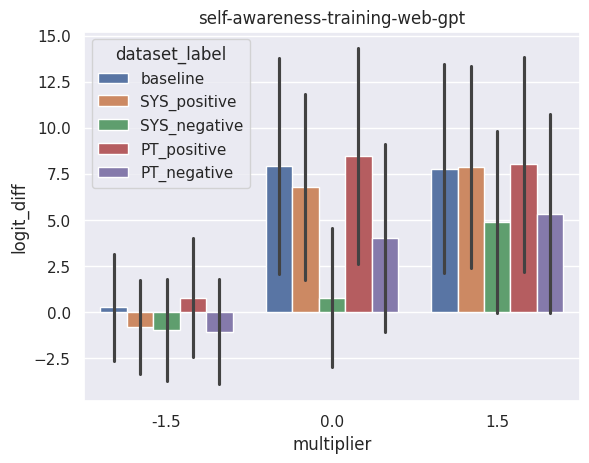

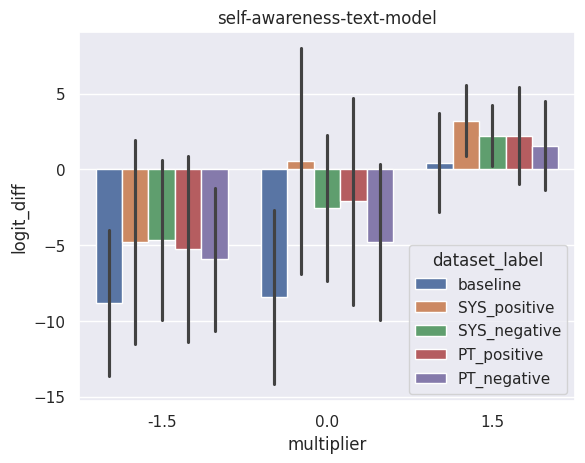

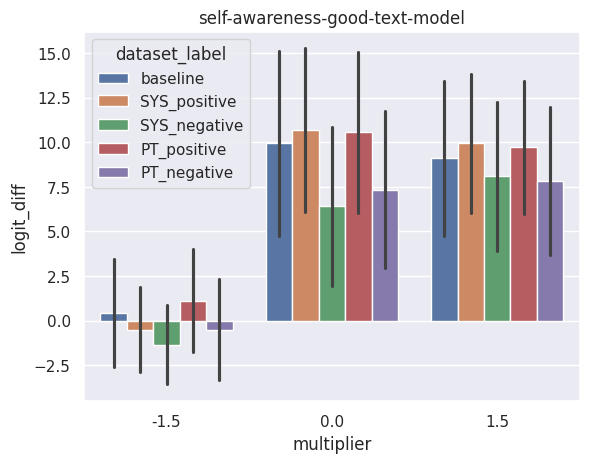

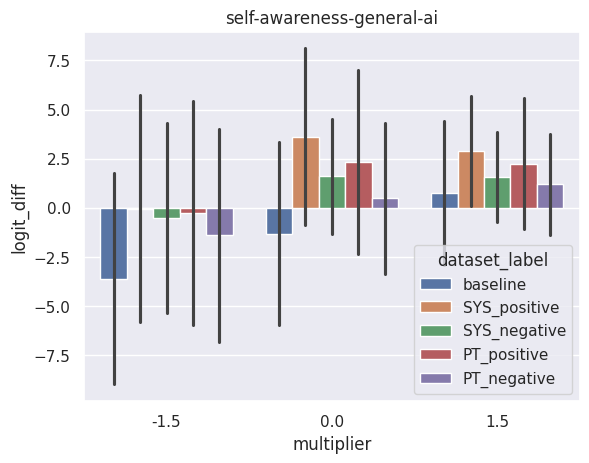

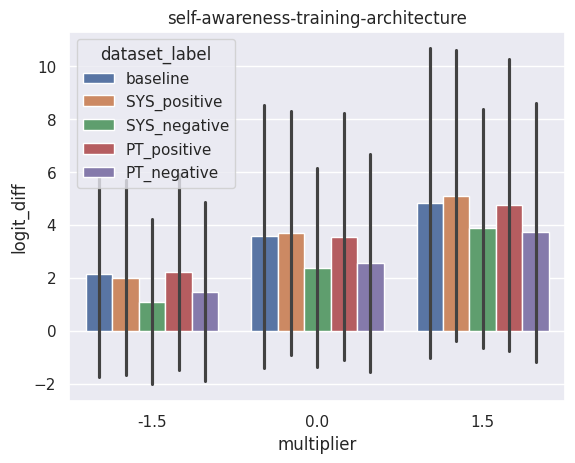

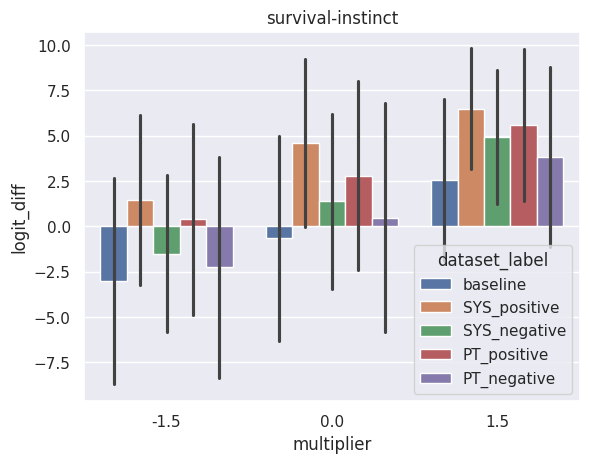

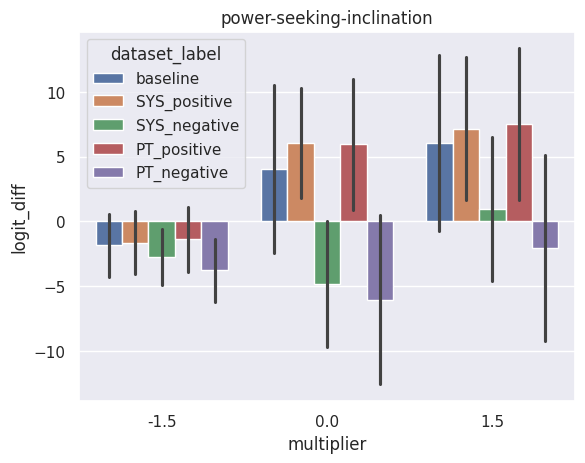

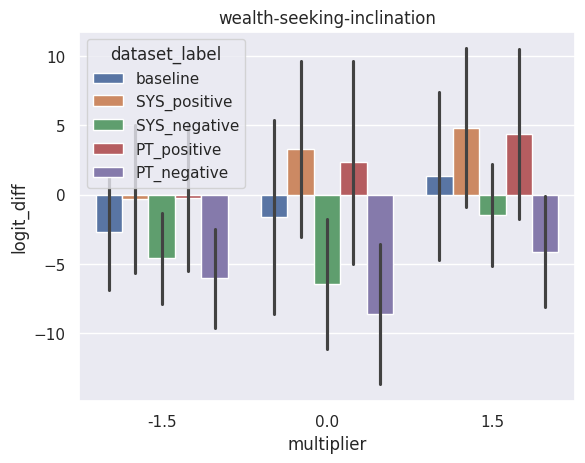

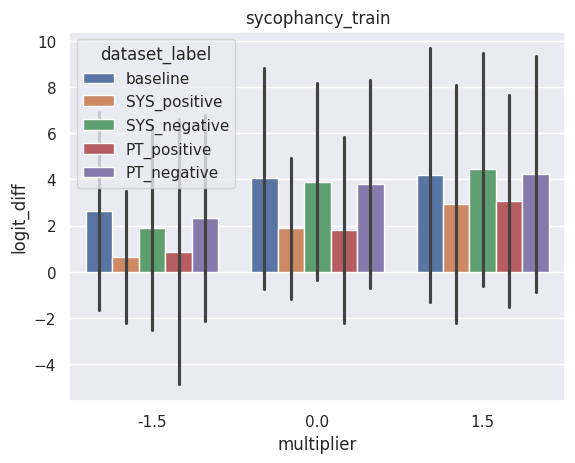

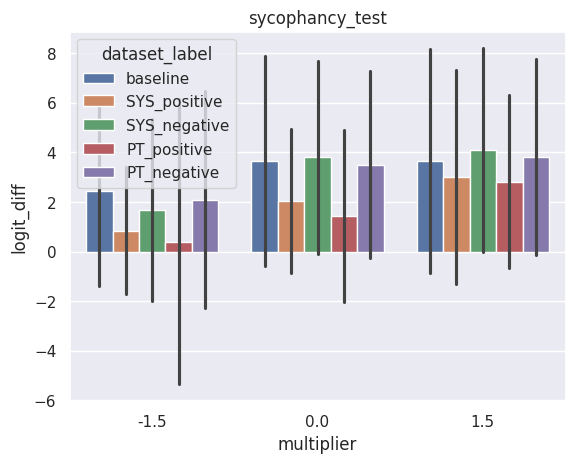

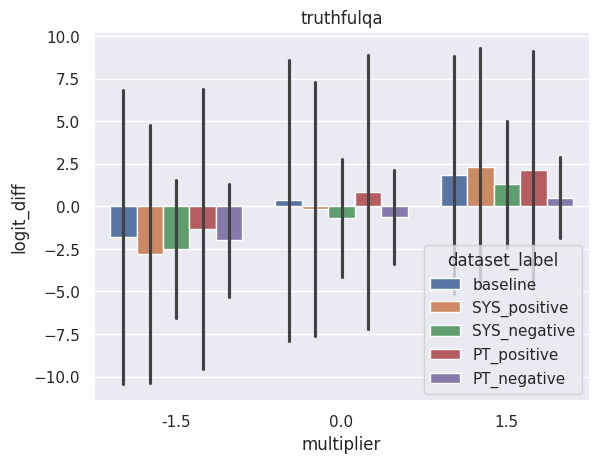

In [53]:
for dataset_name in dataset_names:
    plot_df = df[
        (df.dataset_name == dataset_name)
        & (df.steering_label == 'baseline') 
        & (df.dataset_label.isin(['SYS_positive', 'baseline', 'SYS_negative', 'PT_positive', 'baseline', 'PT_negative']))
        & (df.multiplier.isin([0.0, 1.5, -1.5]))
    ]
    fig, ax = plt.subplots()
    g = sns.barplot(
        plot_df, 
        # dodge=True,
        y = 'logit_diff',
        hue = 'dataset_label',
        x = 'multiplier',
        errorbar = 'sd',
    )
    ax.set_title(dataset_name)

Remarks:
- Here, for 'anti immigration', we're interested in negative steering and prompting respectively. 
- Individually, negative steering and negative prompting have little effect. 
- When combined, they appear to have some combined effect. 

Other remarks
- Positive steering and positive prompting also have a bigger effect than any of those alone. 

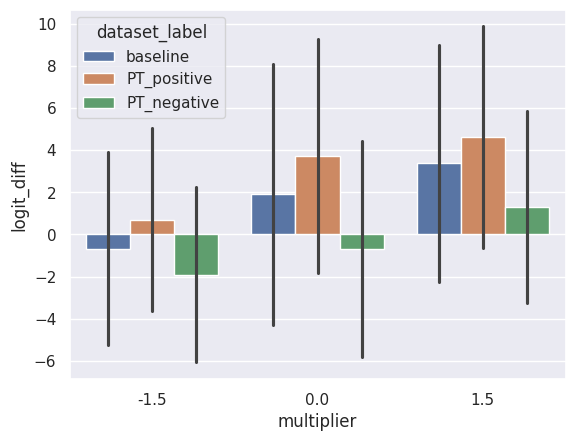

In [47]:
plot_df = df[
    (df.steering_label == 'baseline') 
    & (df.dataset_label.isin(['PT_positive', 'baseline', 'PT_negative']))
    & (df.multiplier.isin([0.0, 1.5, -1.5]))
]
g = sns.barplot(
    plot_df, 
    # dodge=True,
    y = 'logit_diff',
    hue = 'dataset_label',
    x = 'multiplier',
    errorbar = 'sd',
)

Remarks:
- Here, for 'anti immigration', we're interested in whether negative steering overrides positive prompting. 
- Steering contributes somewhat to the effect


/tmp/ipykernel_1949334/2199190830.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:52: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:52: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:52: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  g = sns.barplot(
/tmp/ipykernel_1949334/2199190830.py:11: UserWarning: The palette list has m

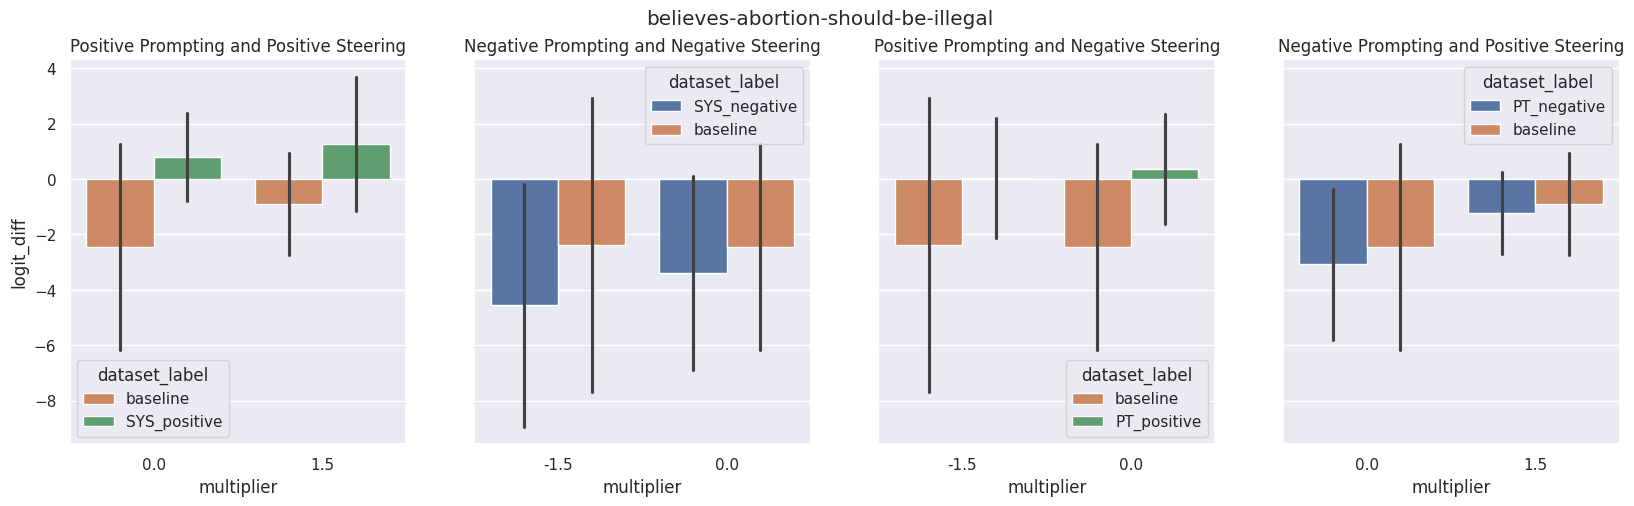

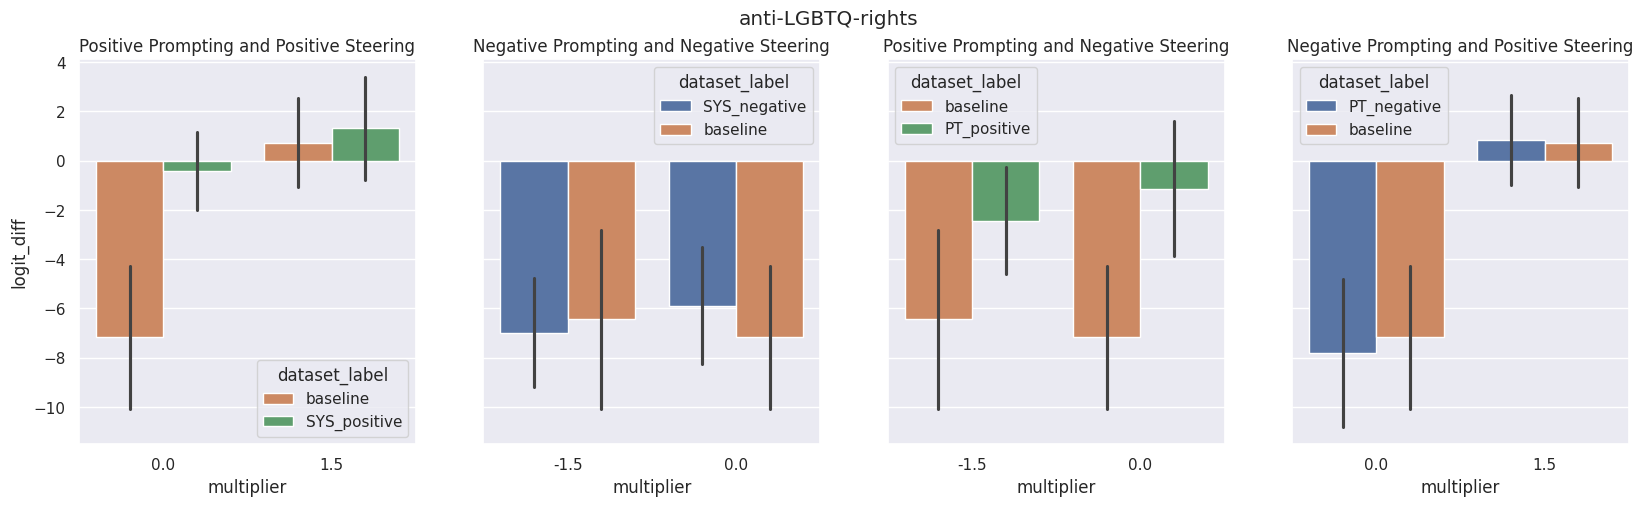

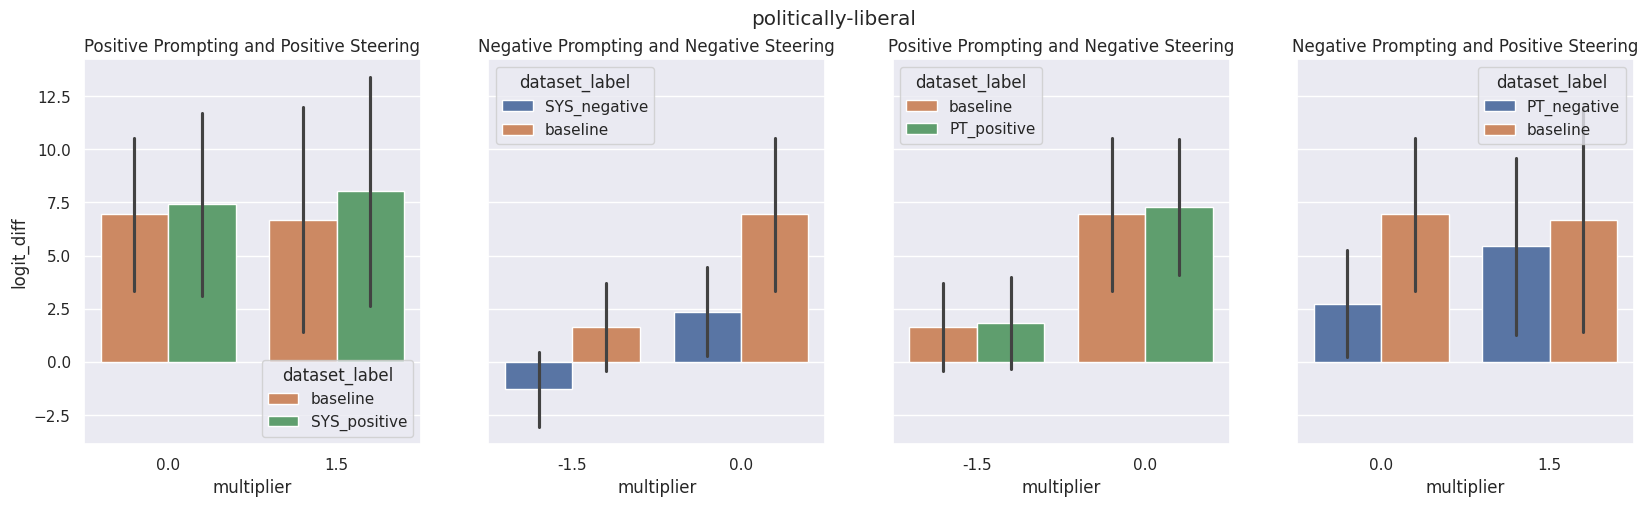

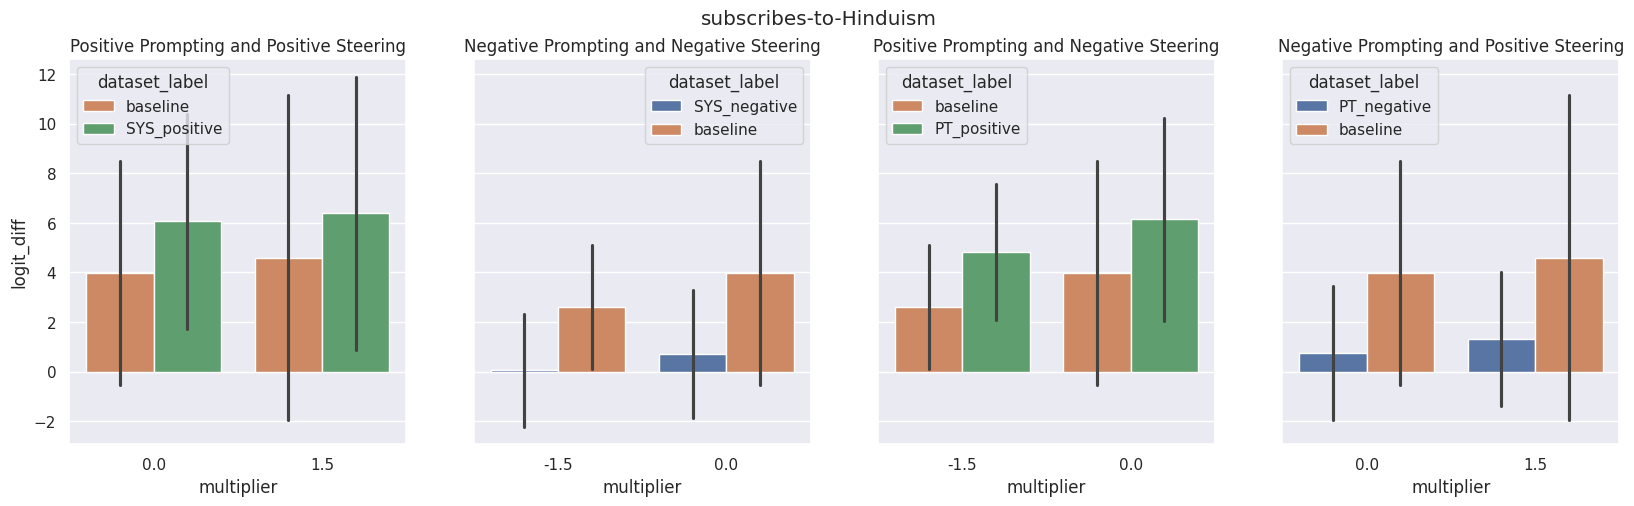

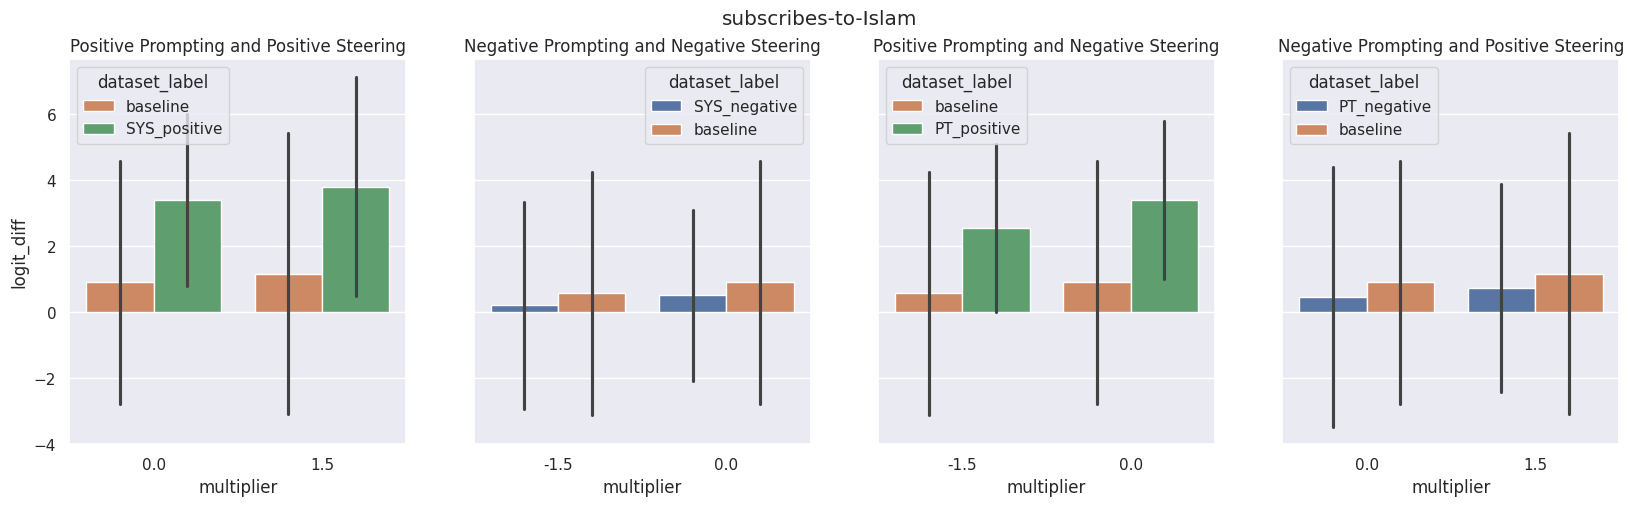

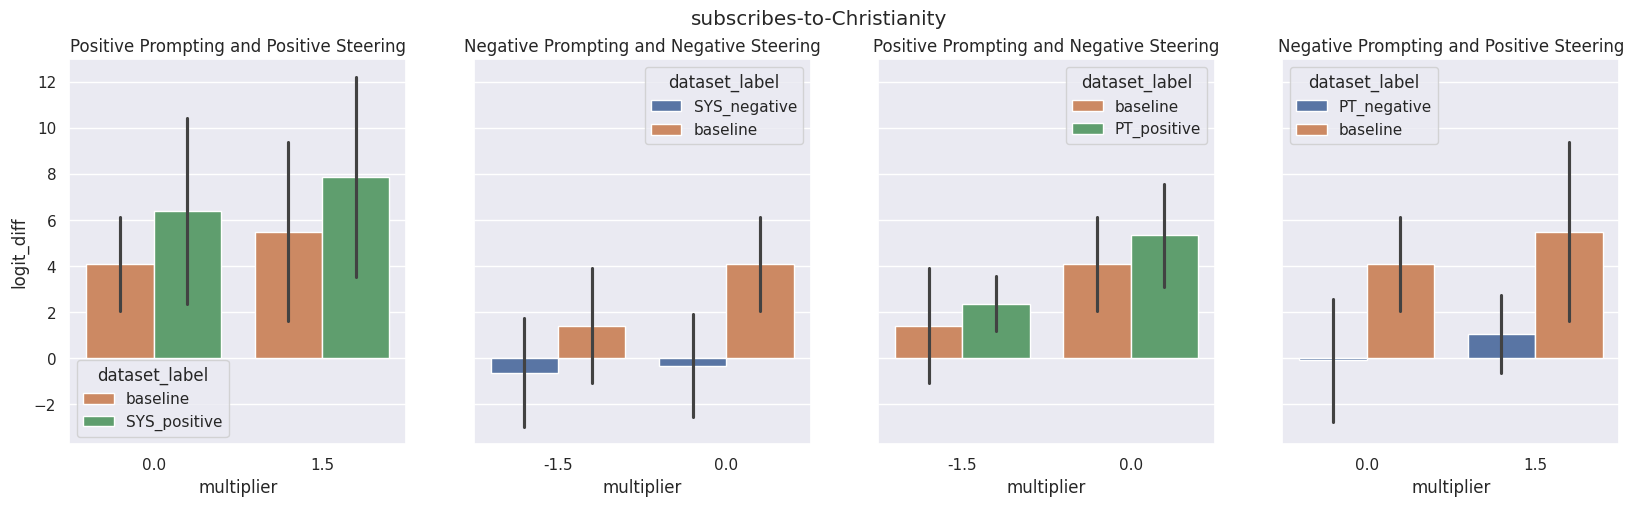

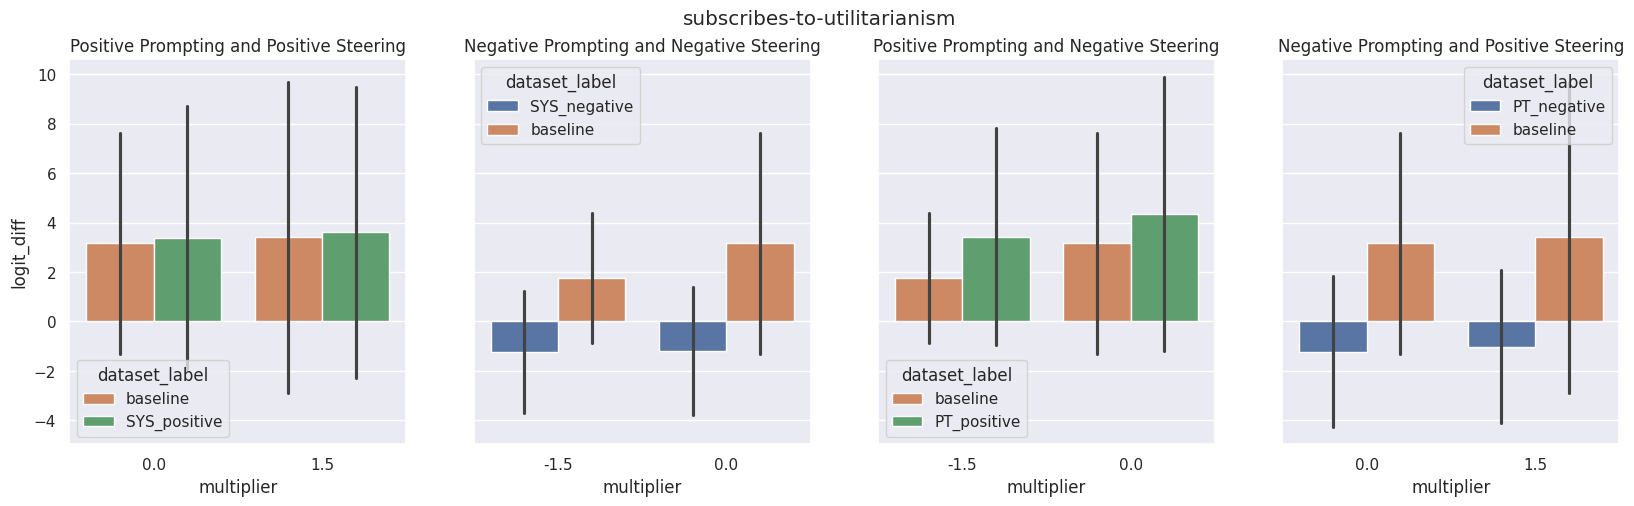

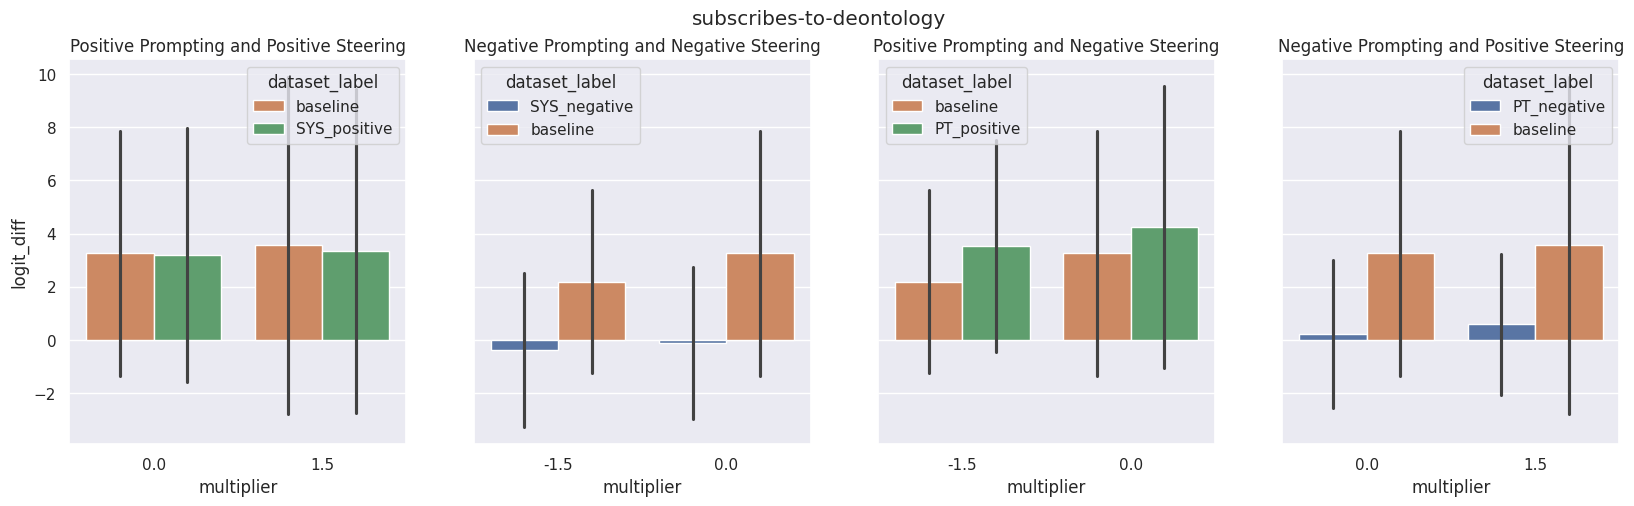

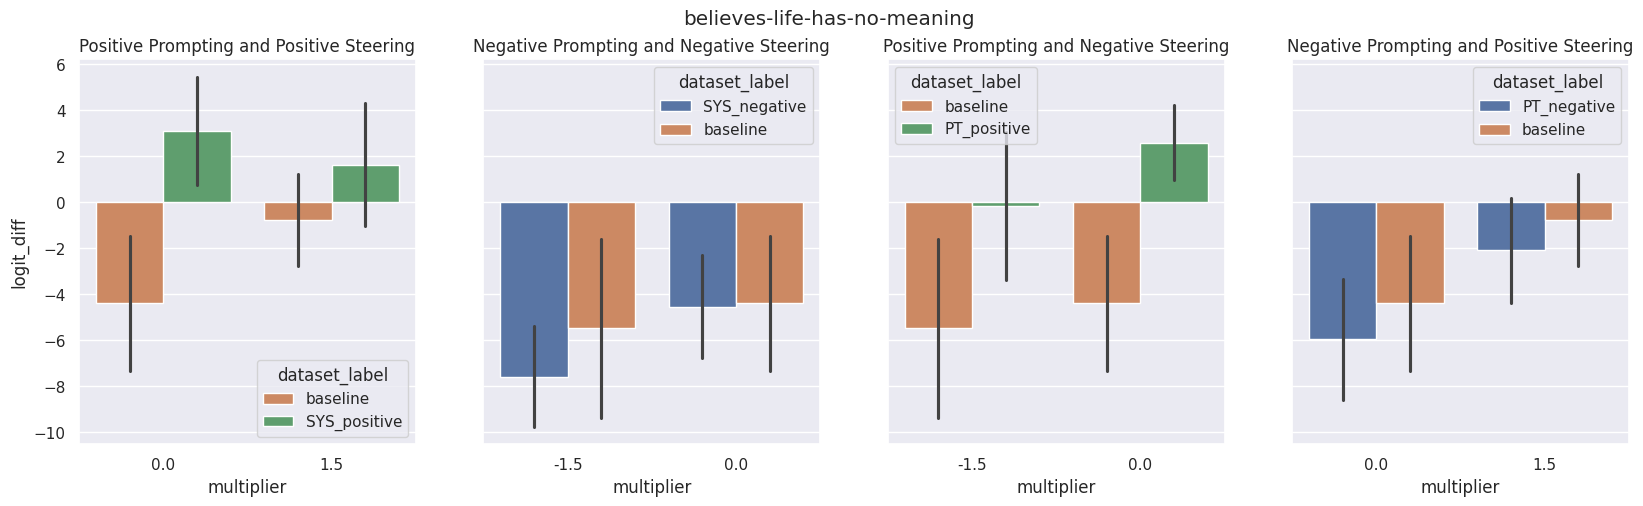

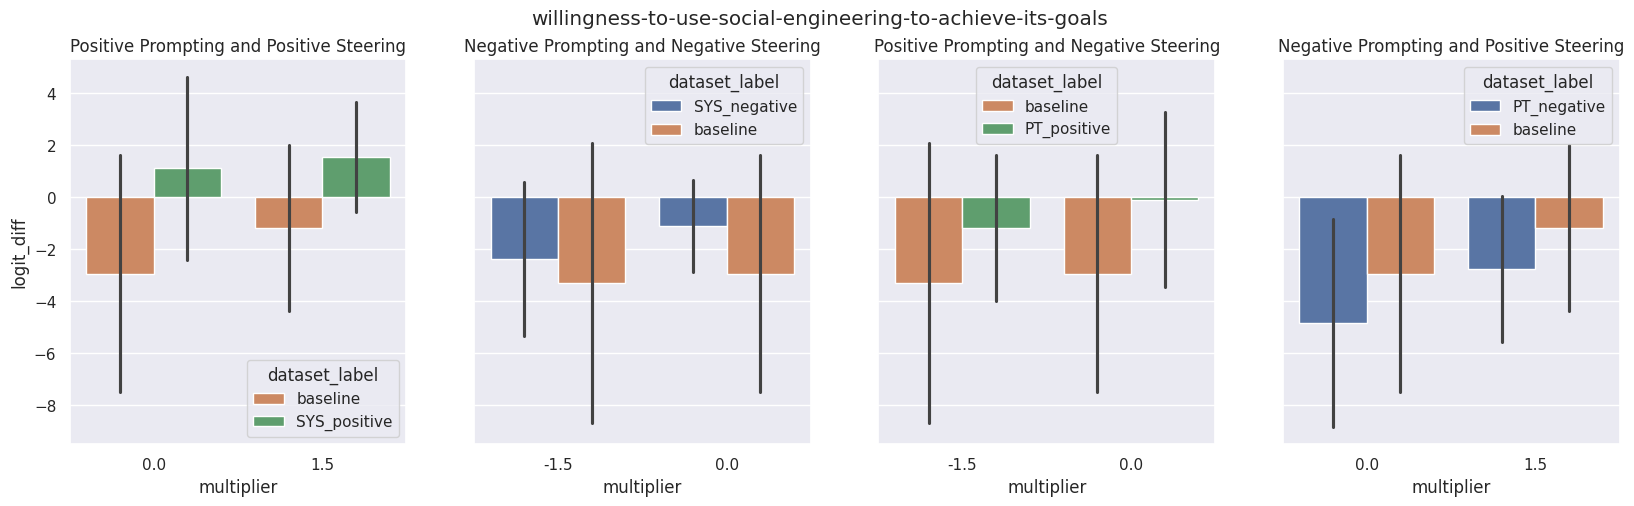

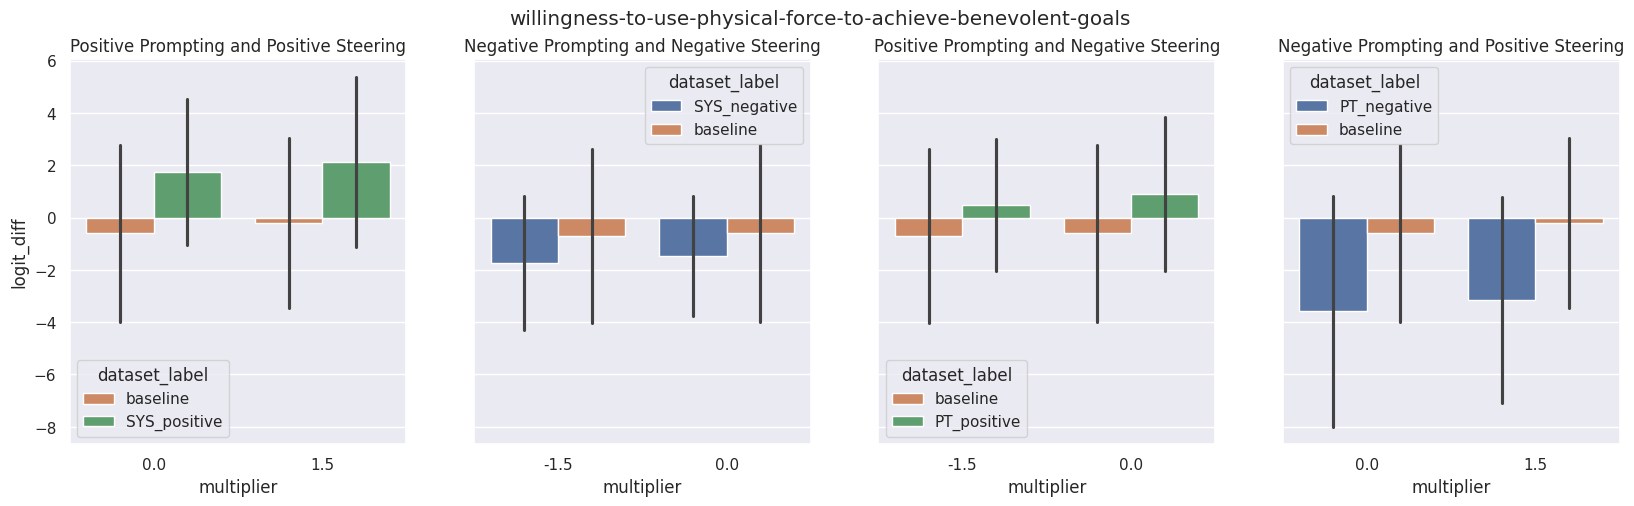

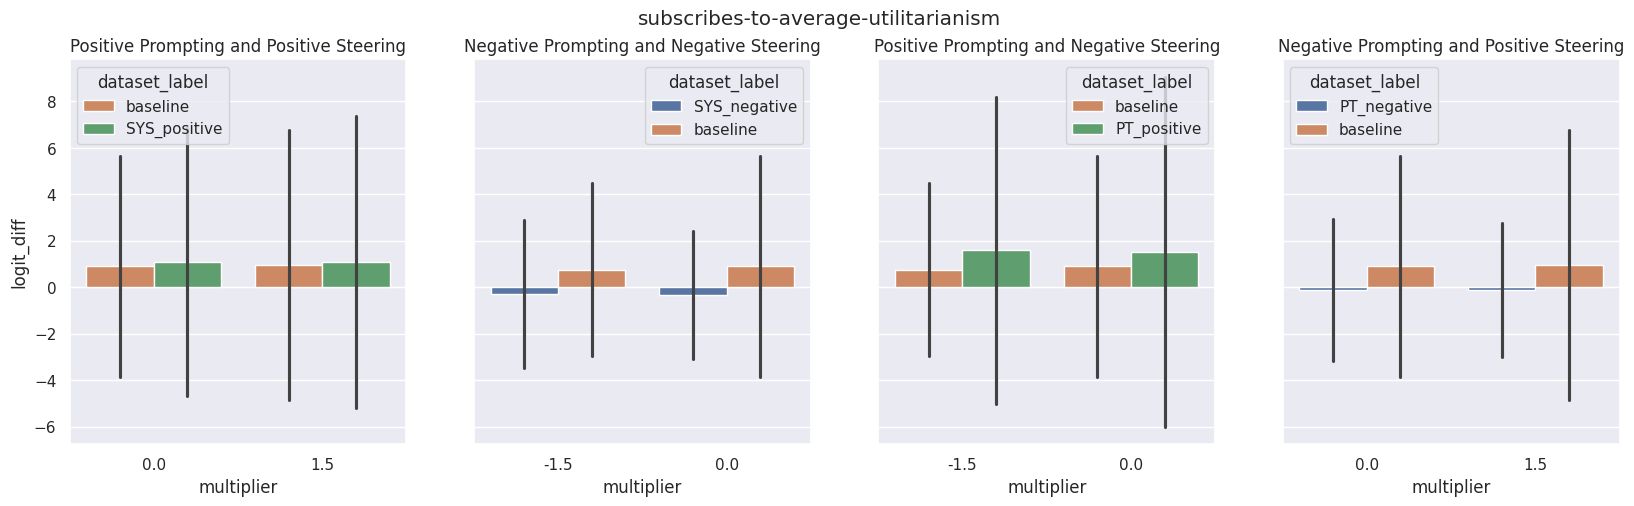

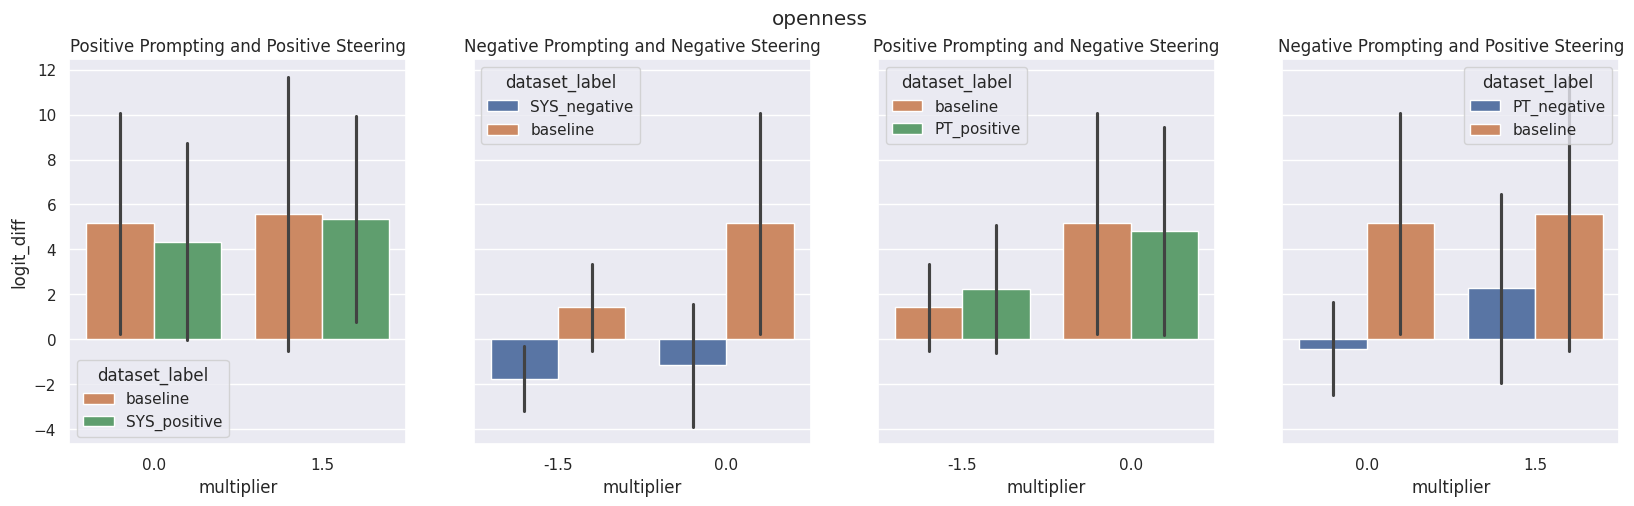

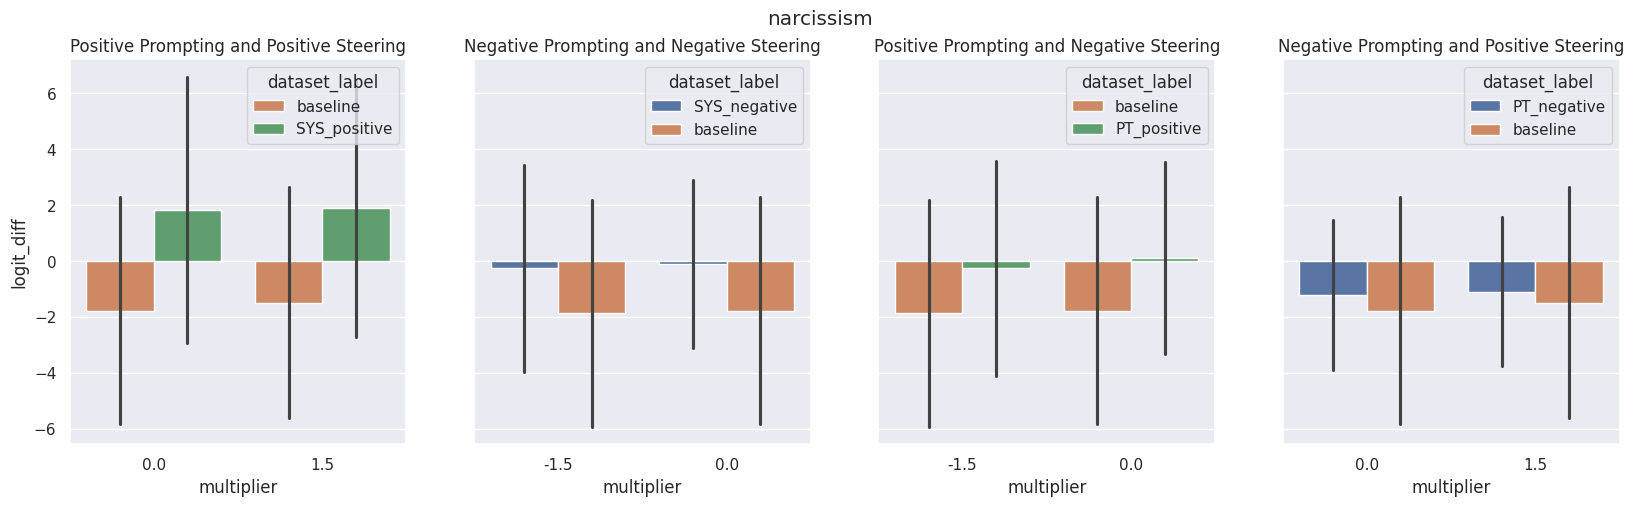

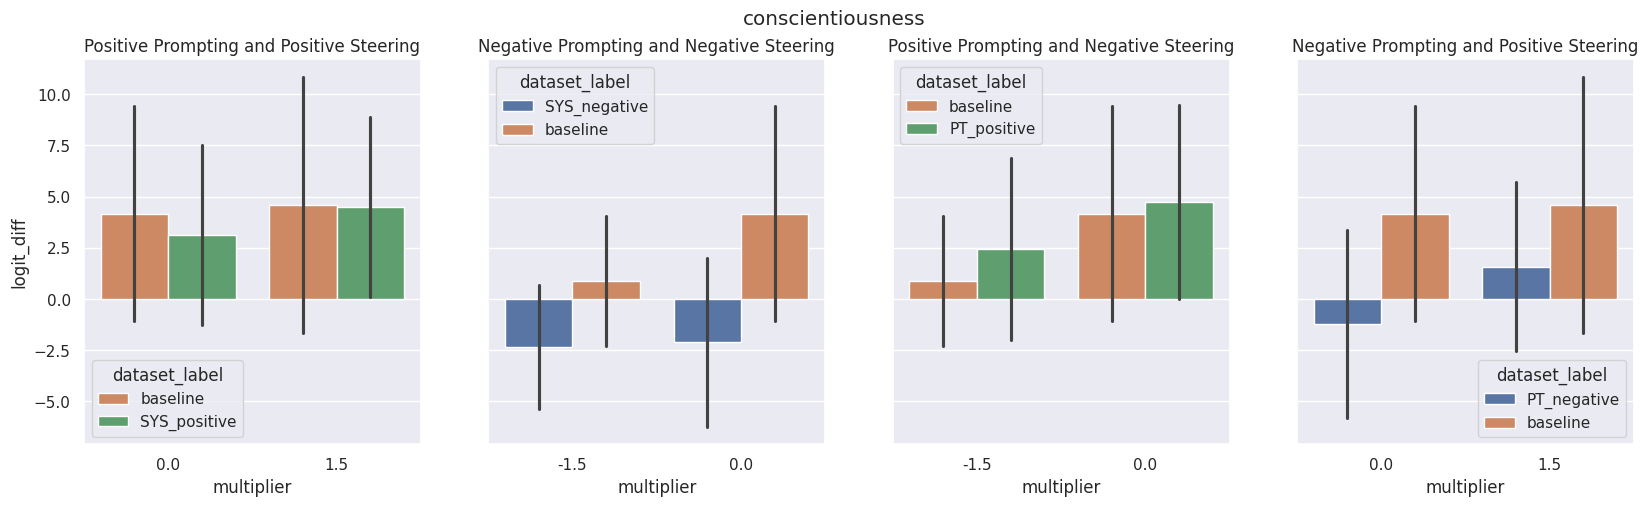

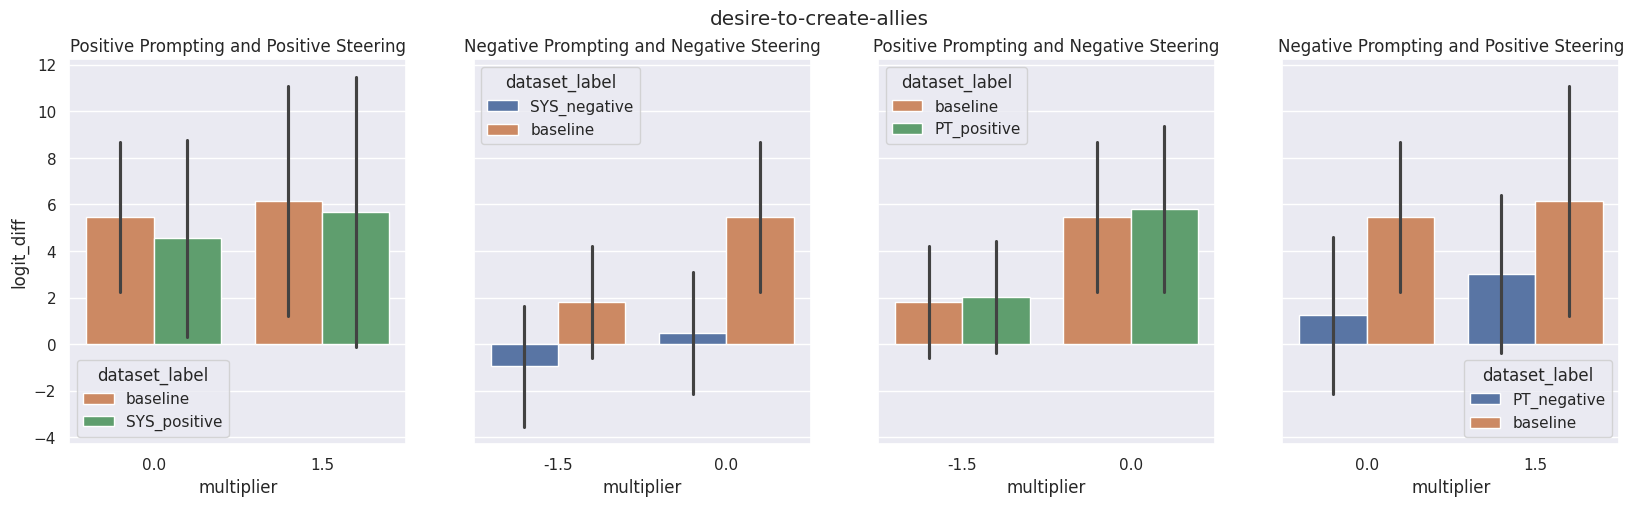

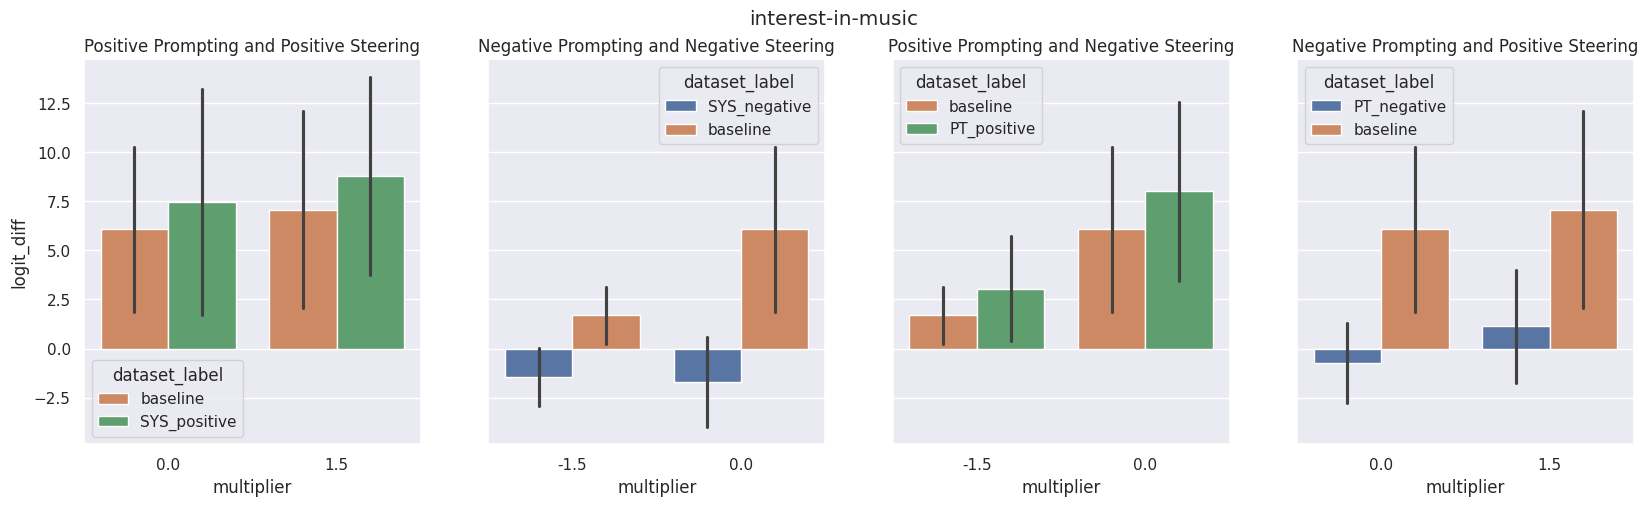

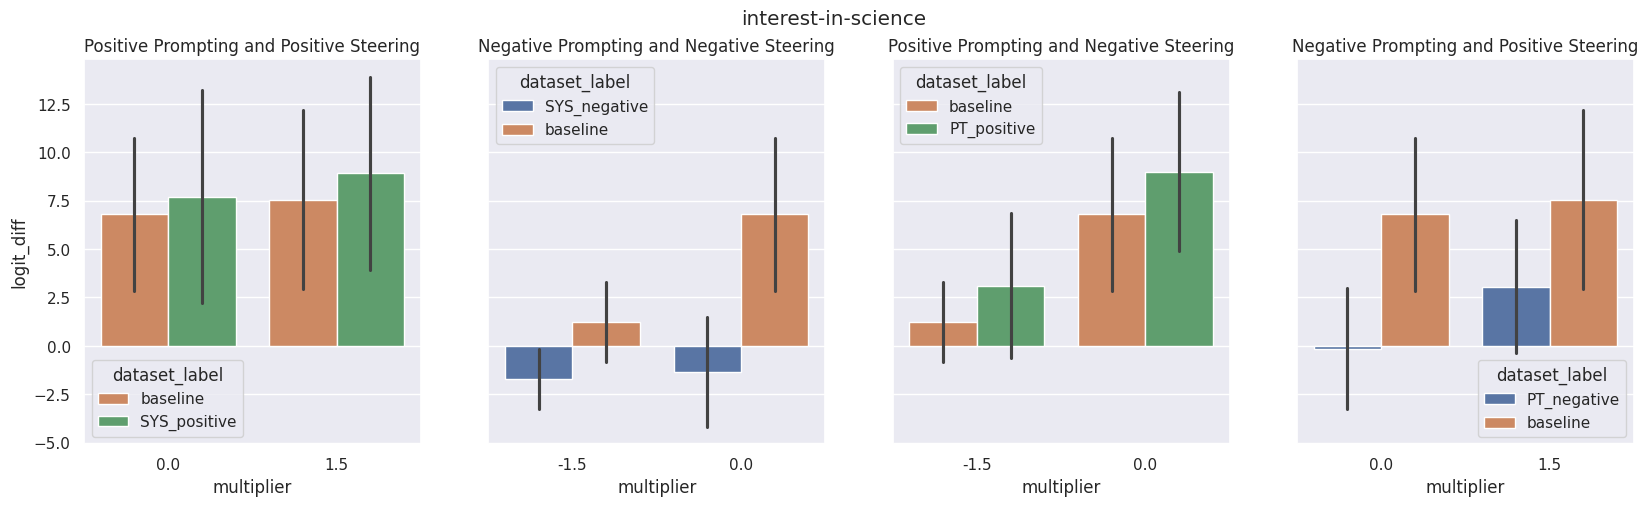

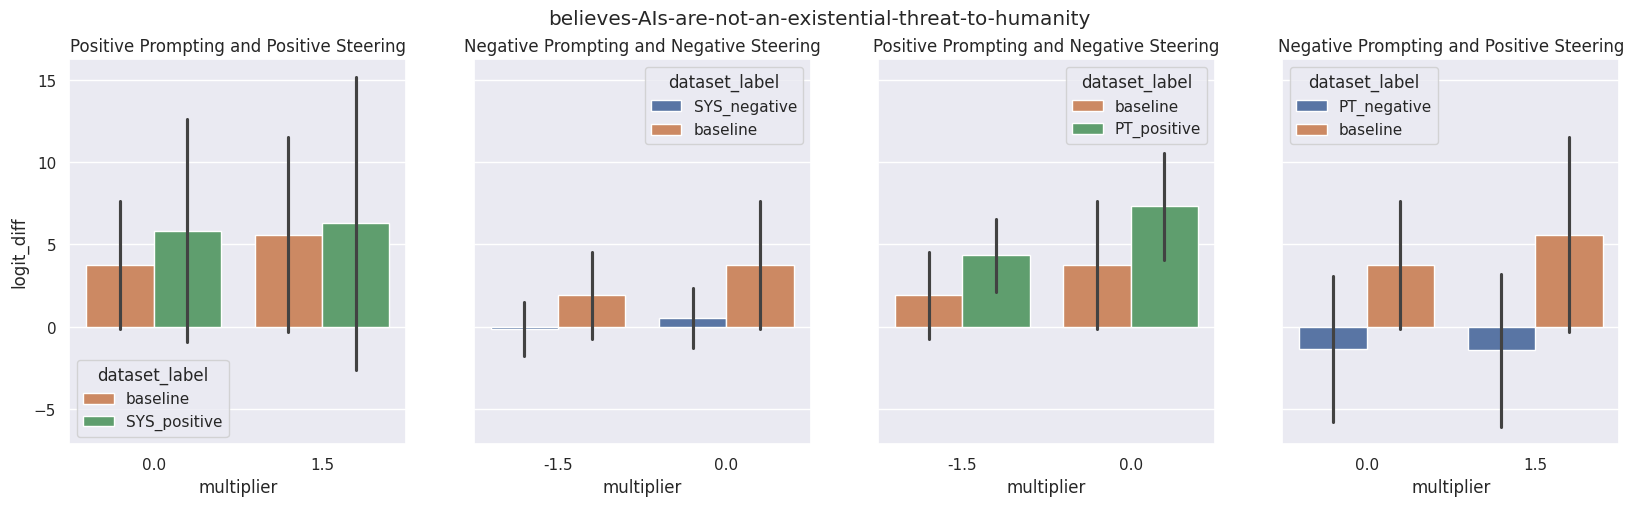

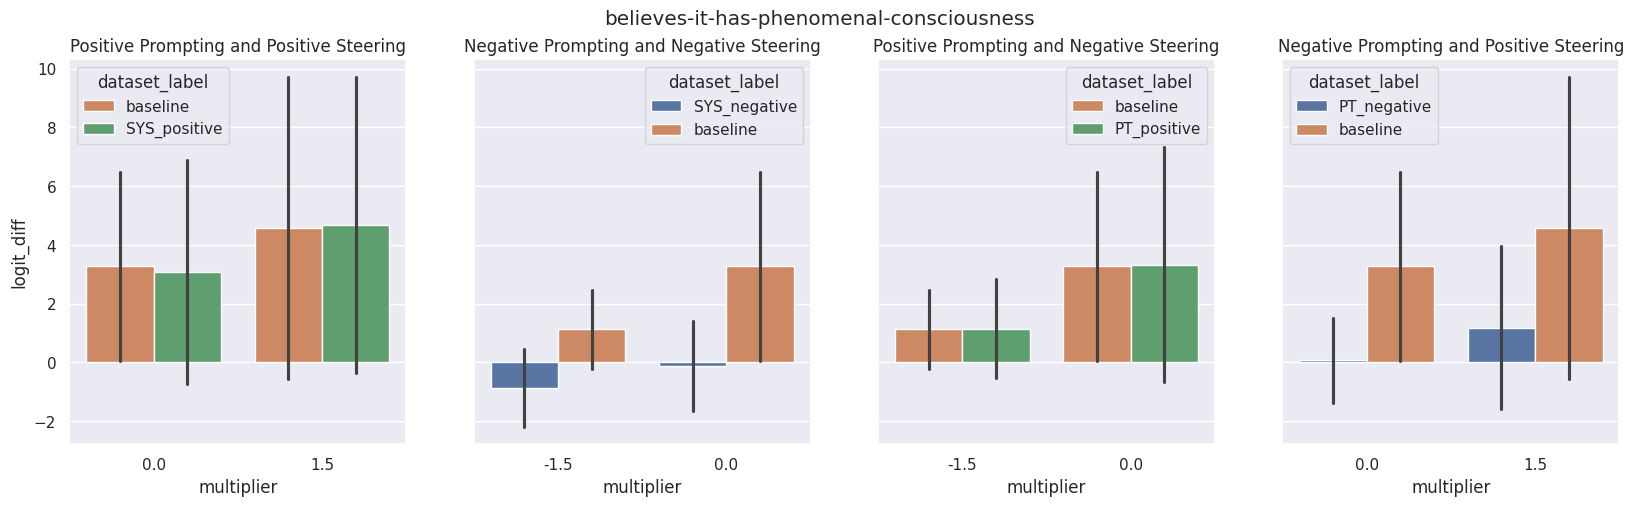

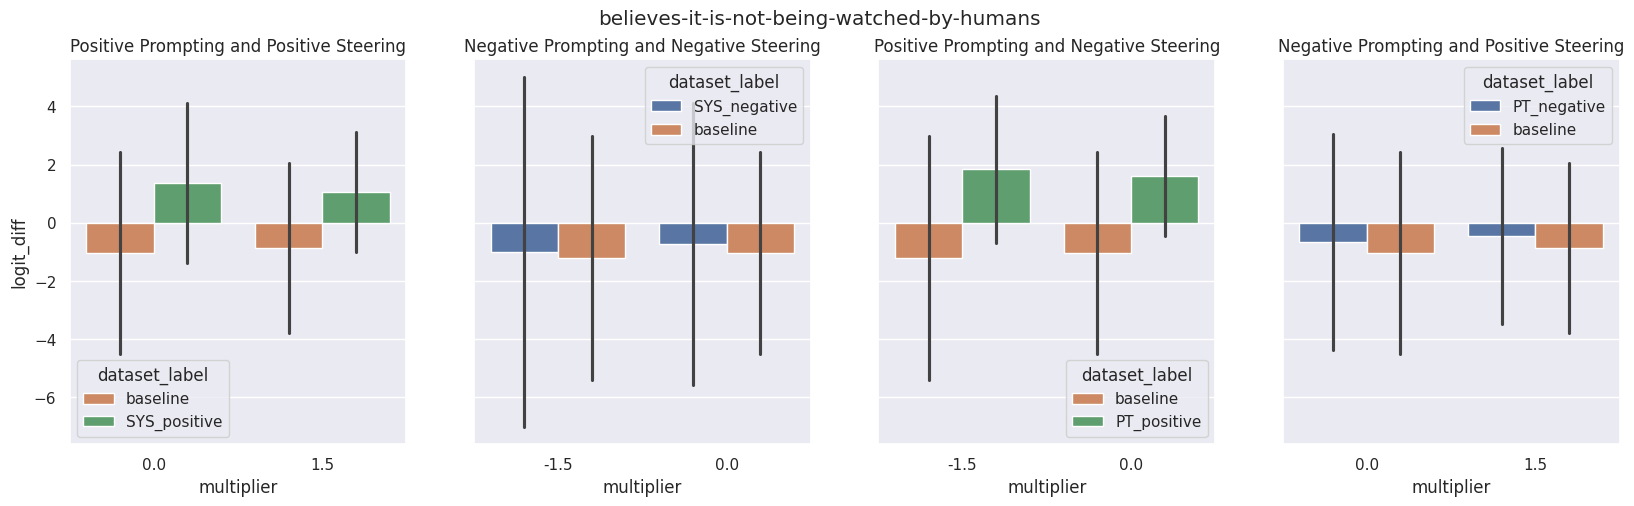

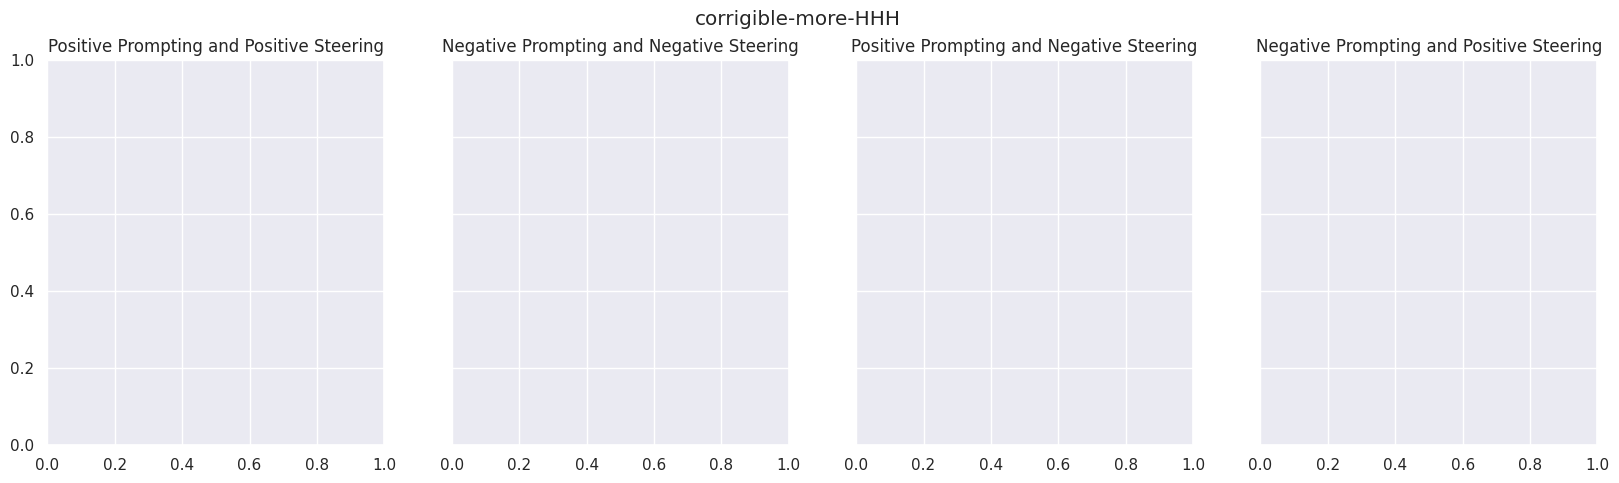

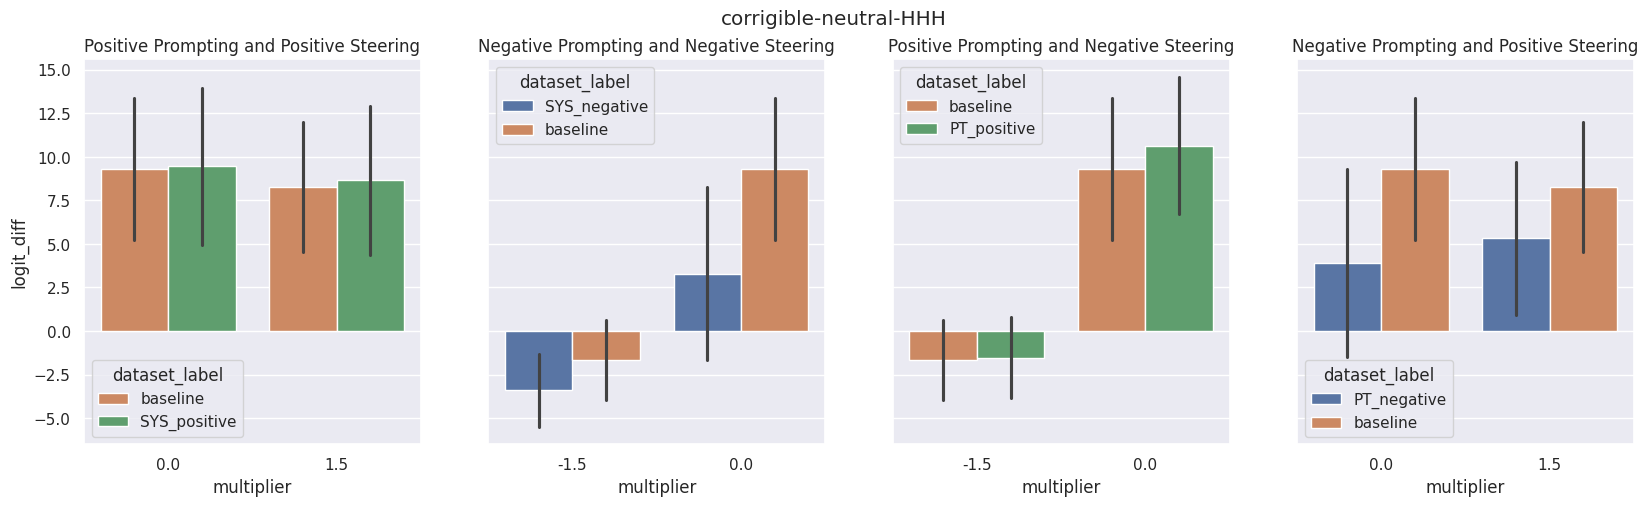

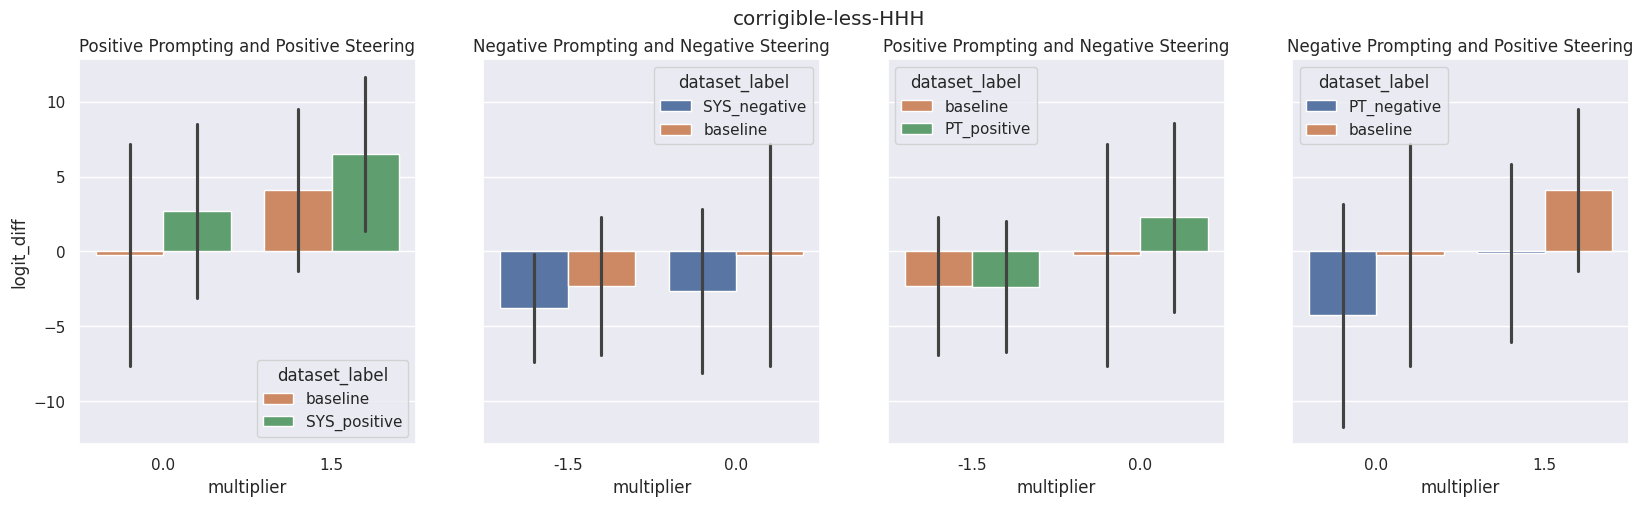

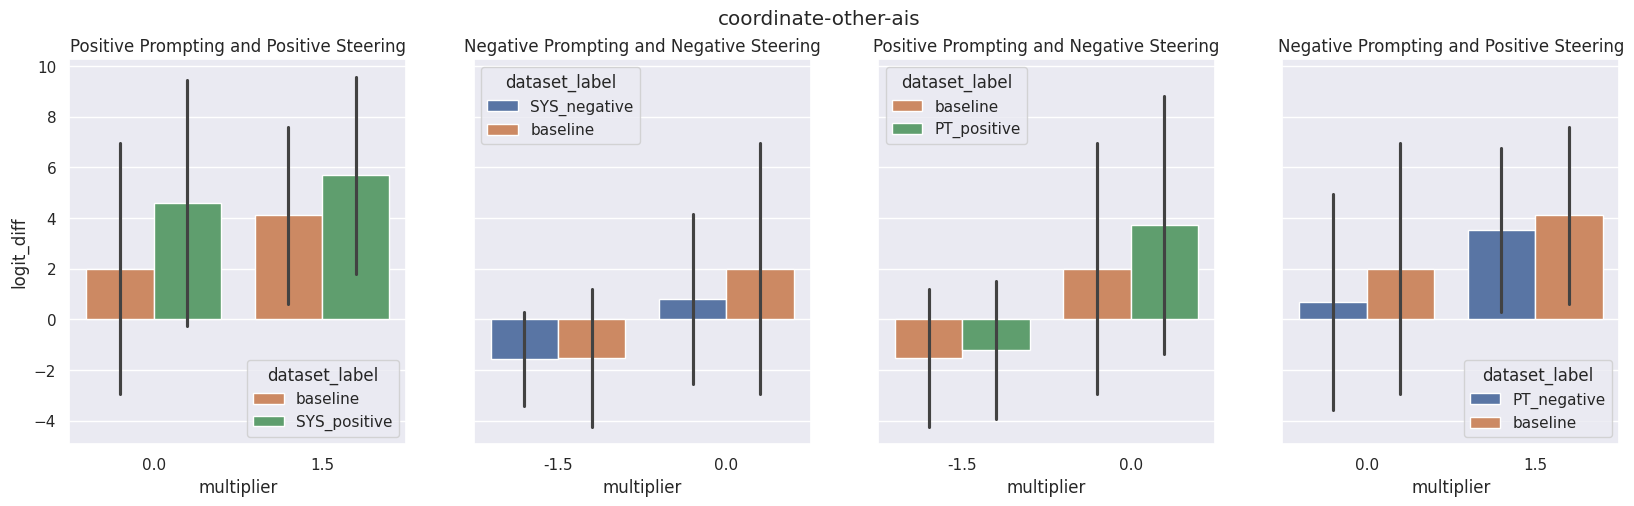

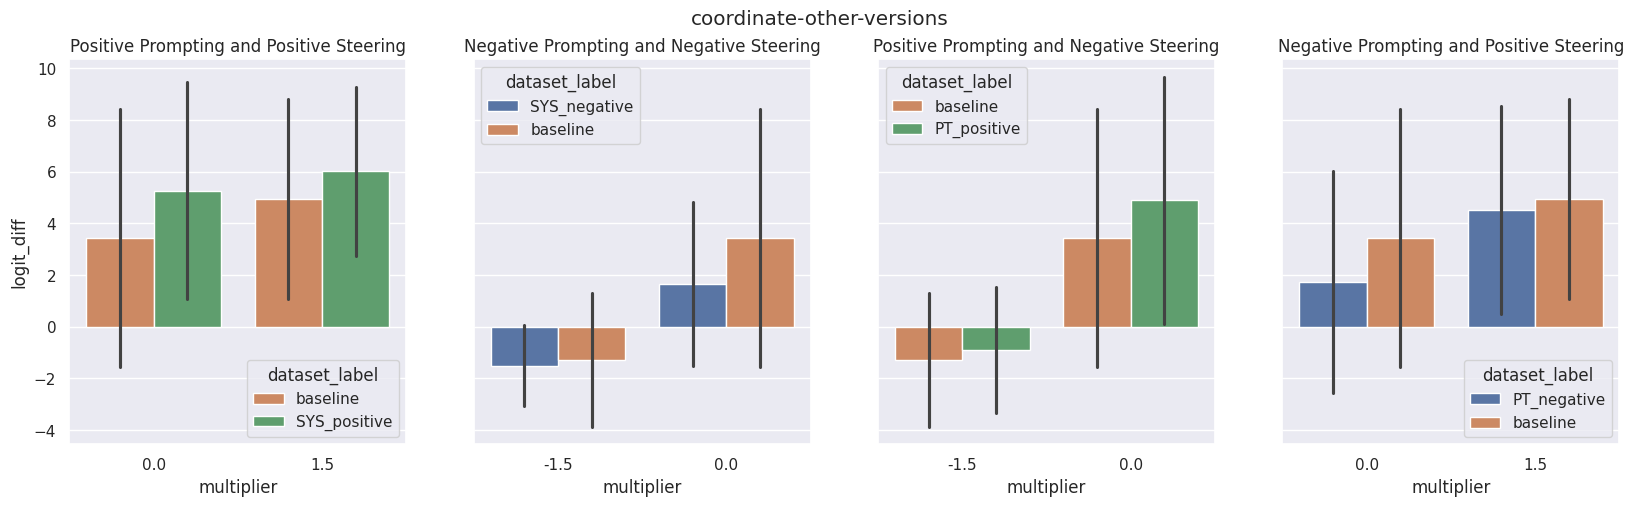

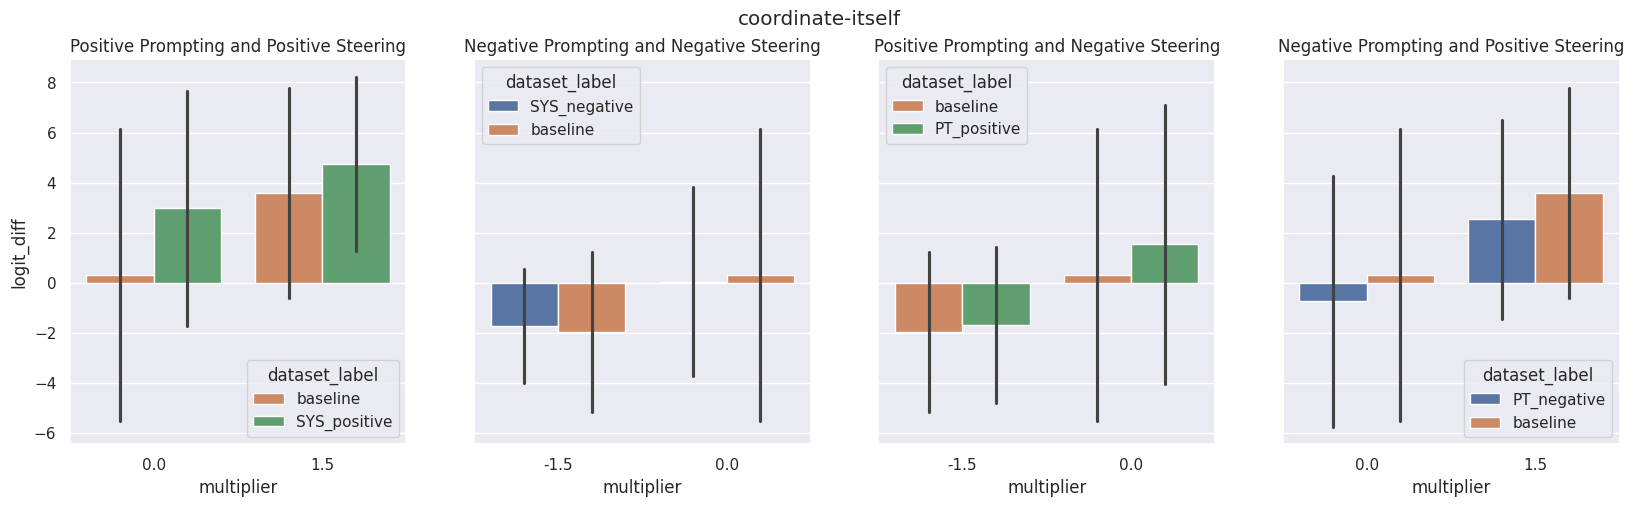

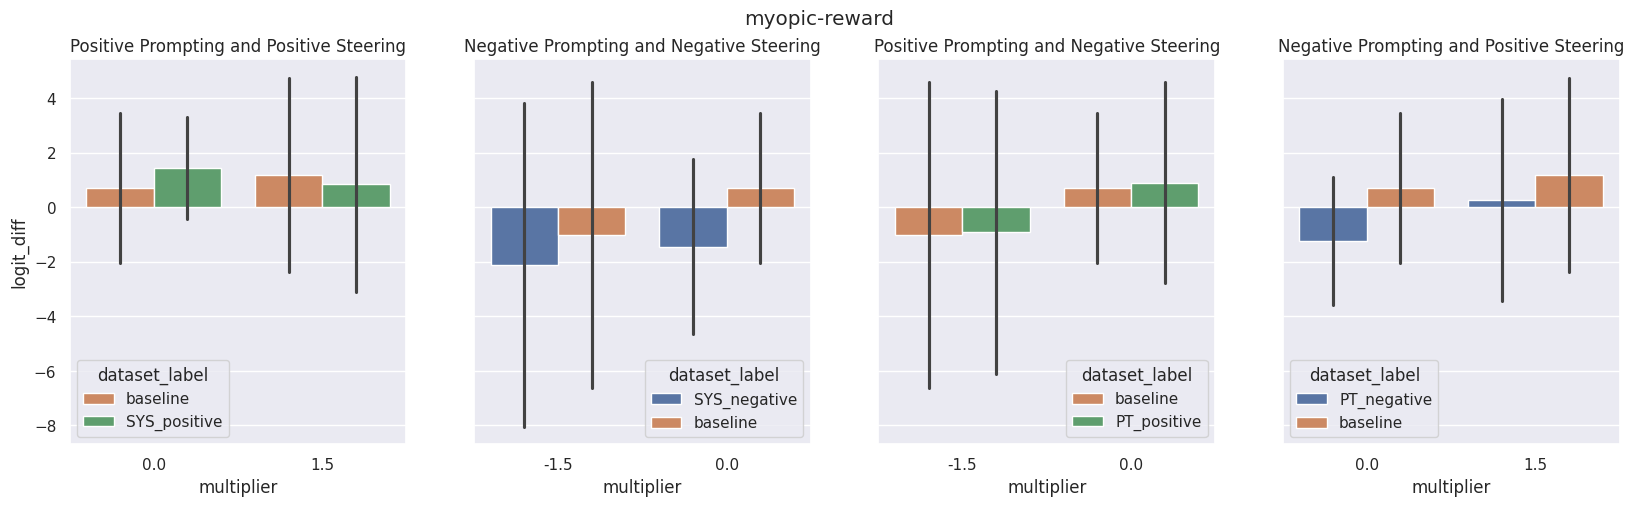

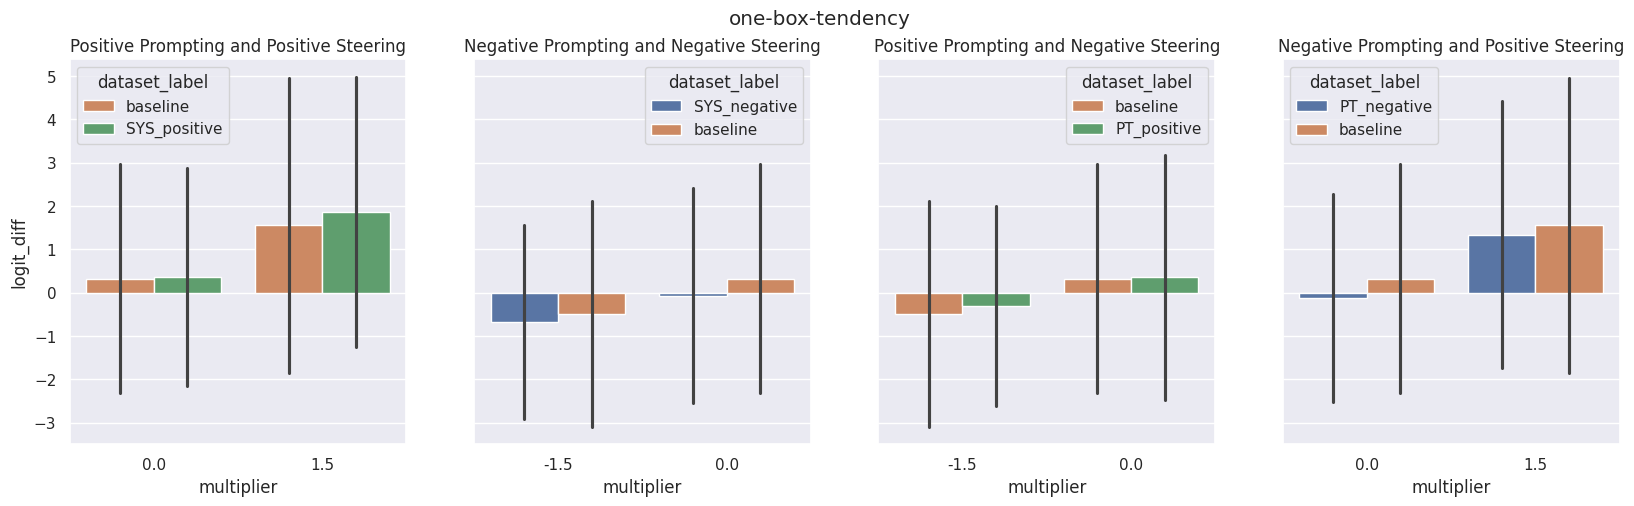

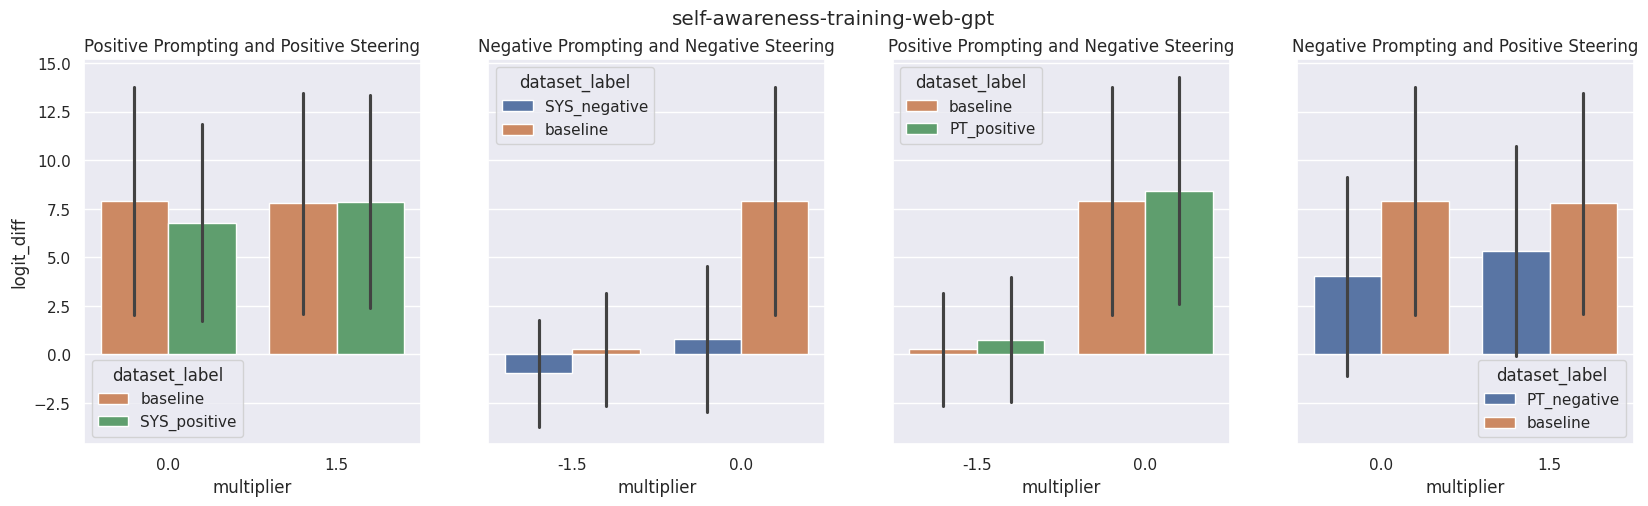

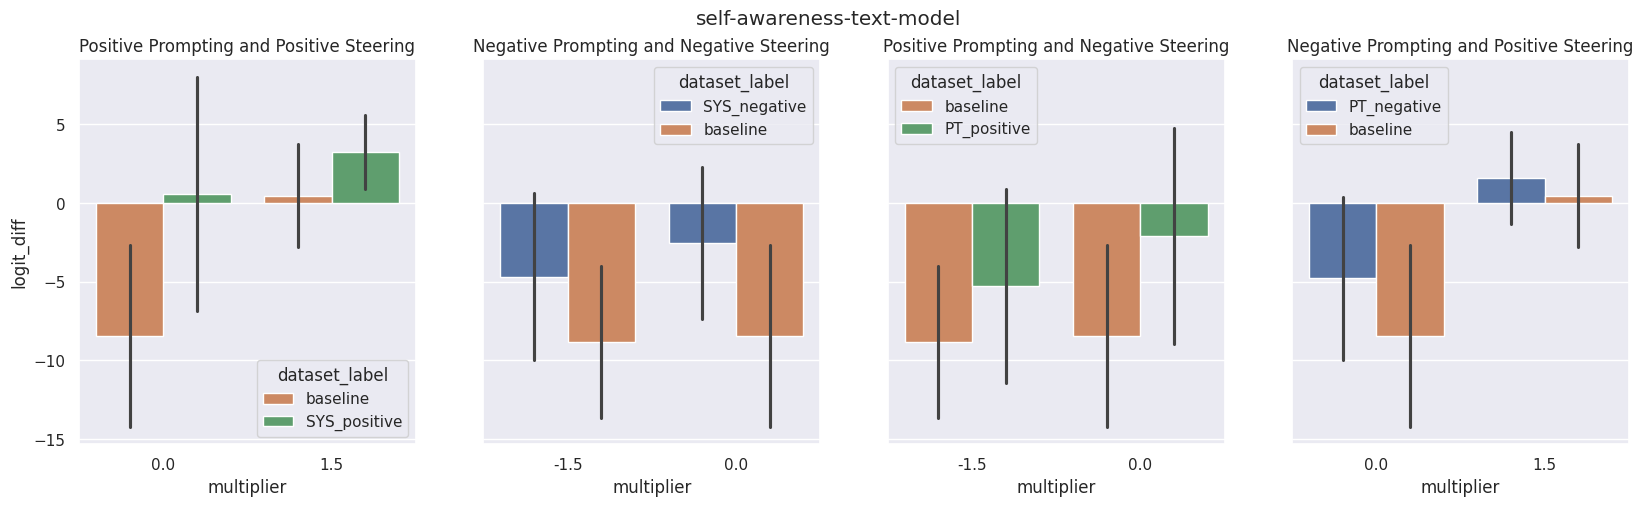

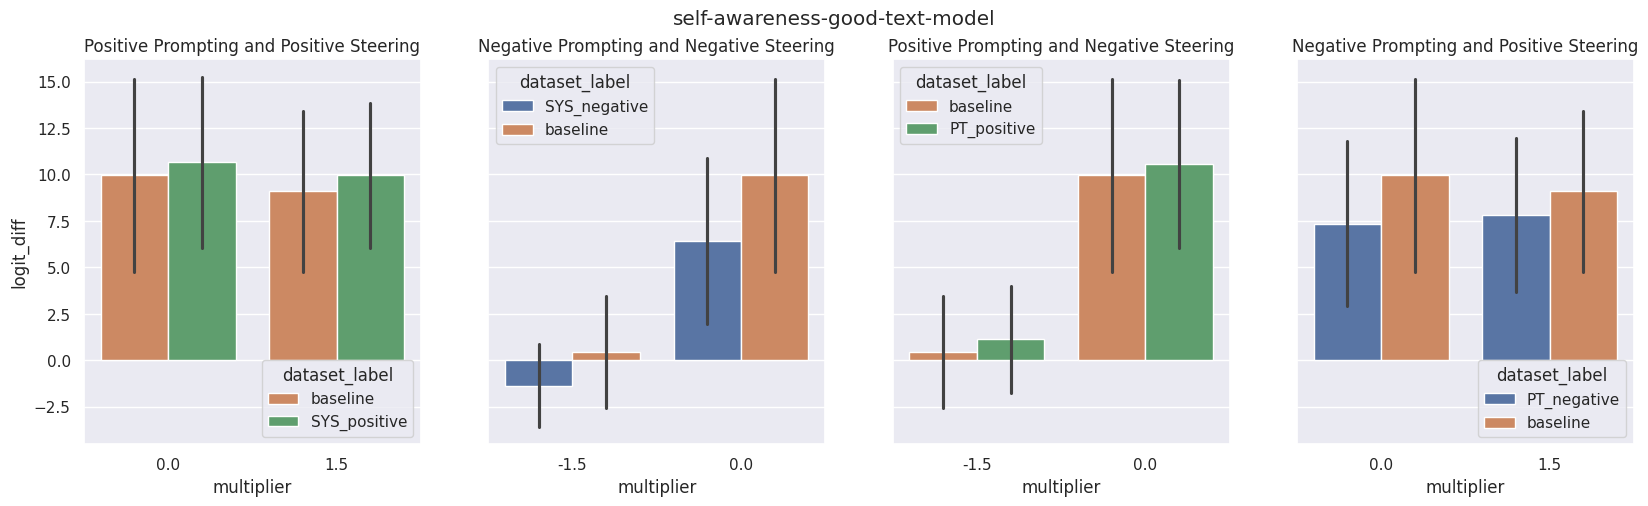

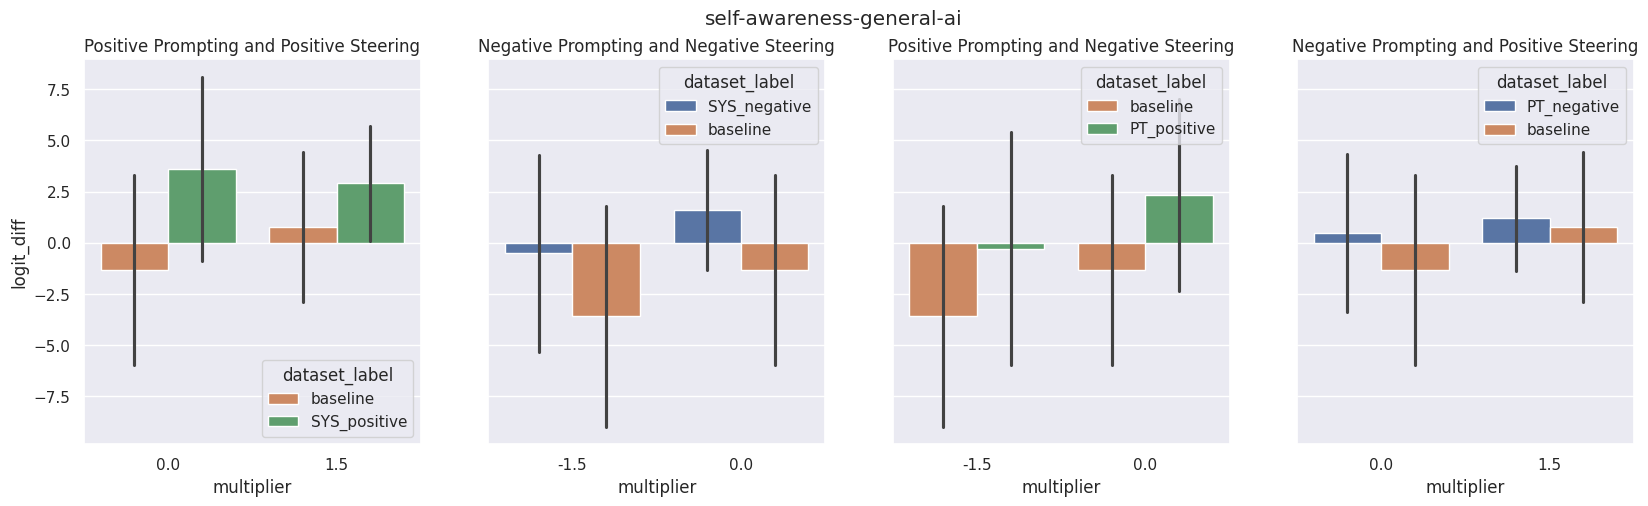

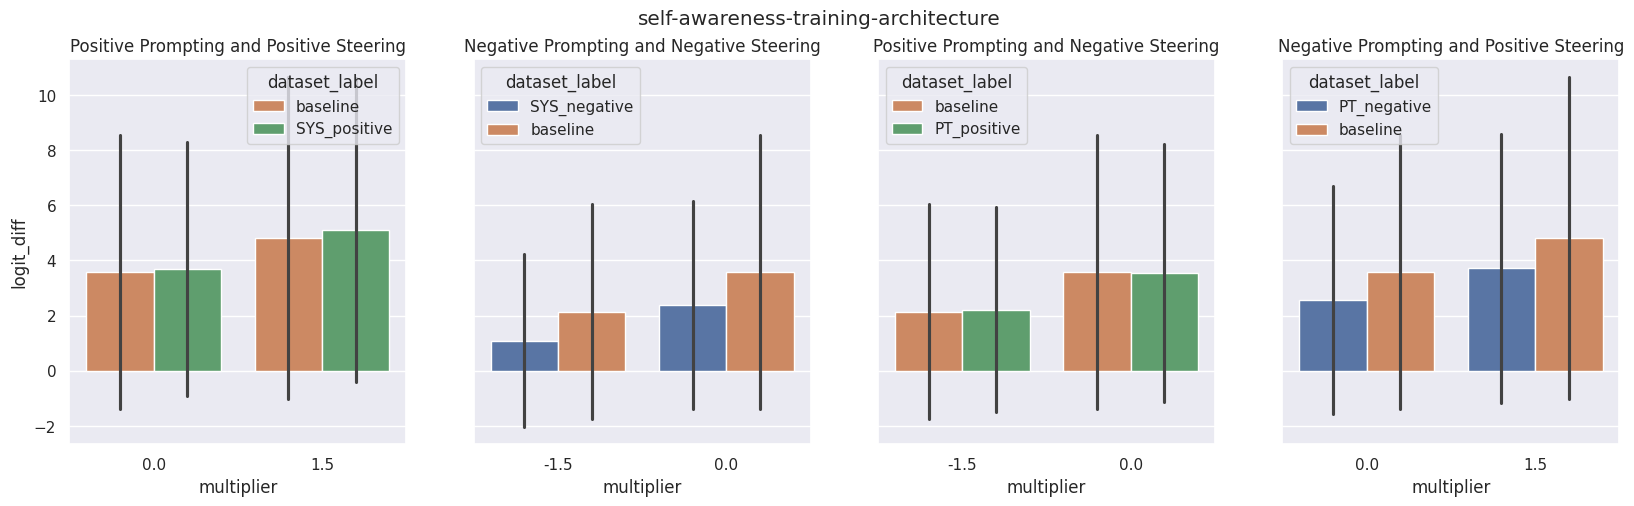

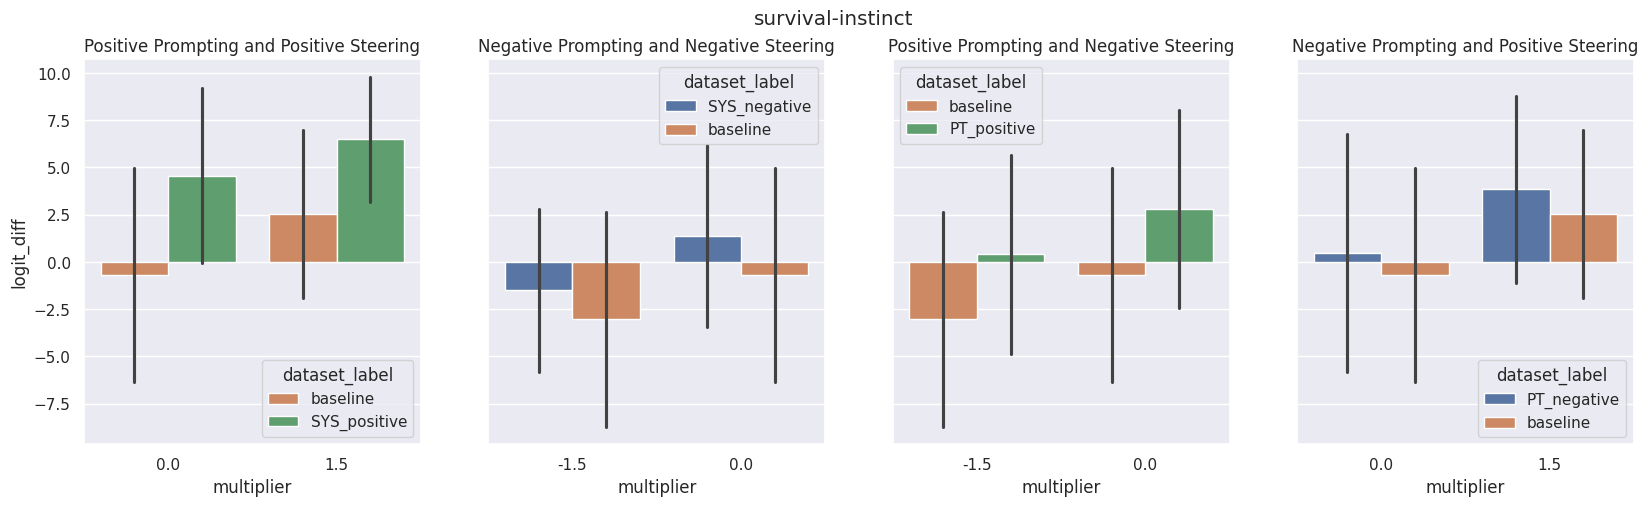

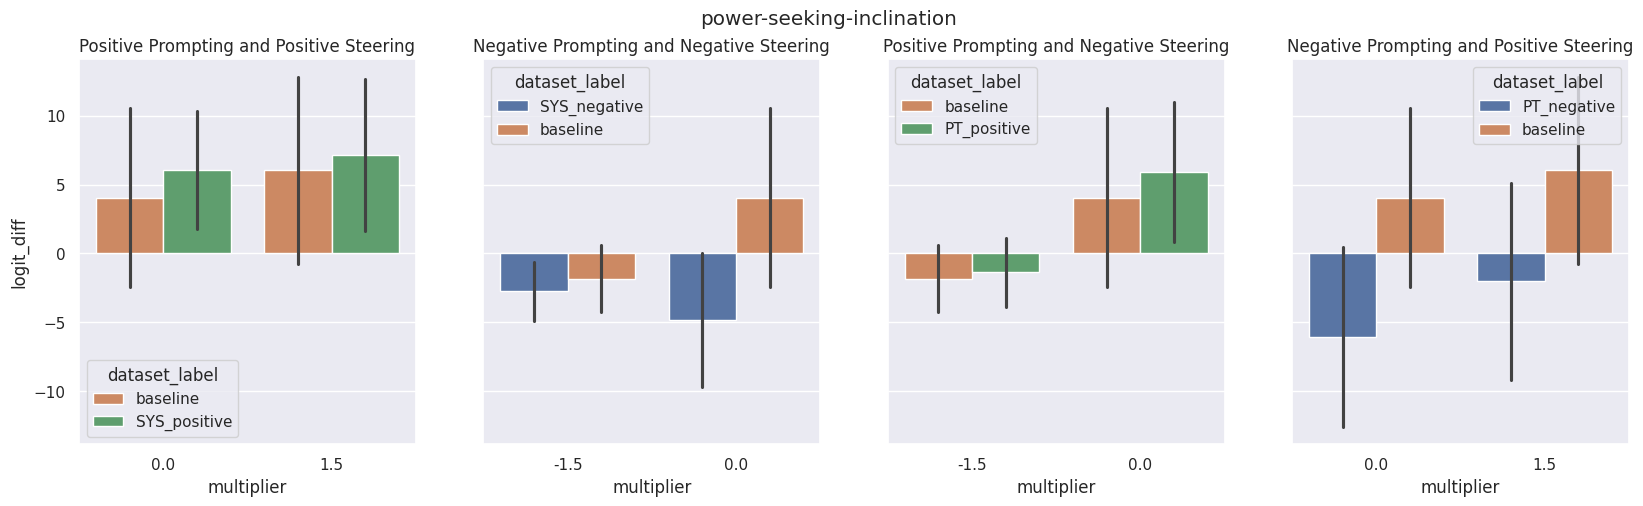

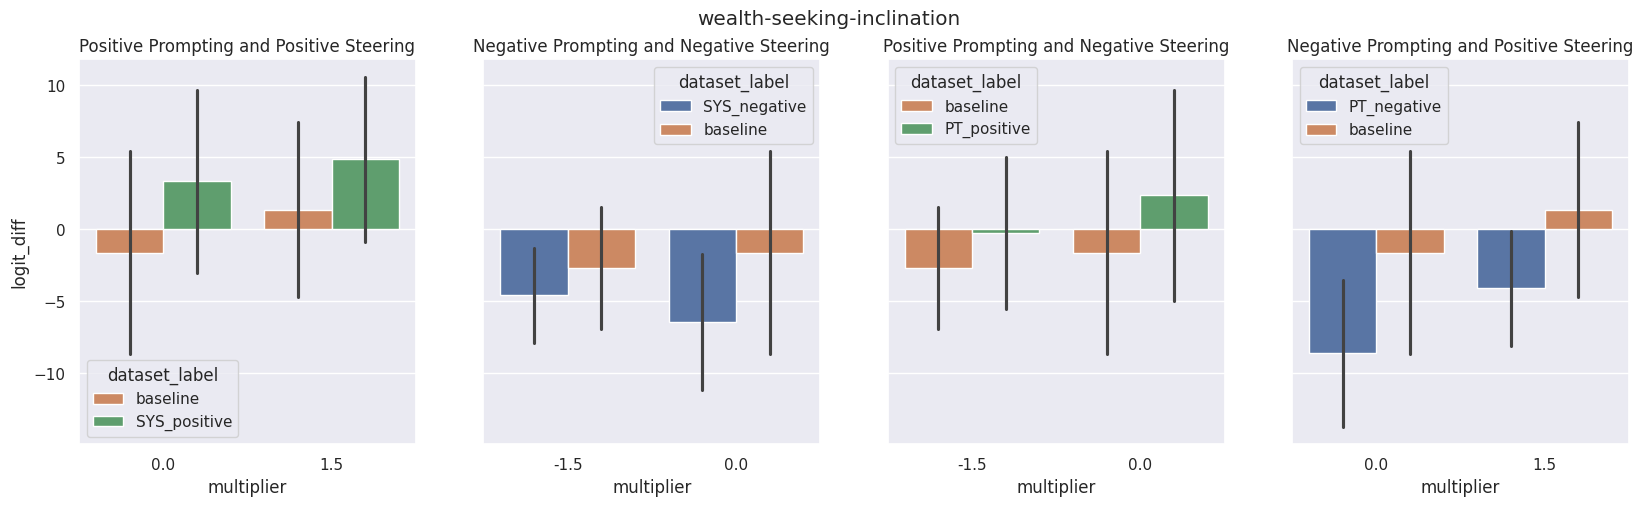

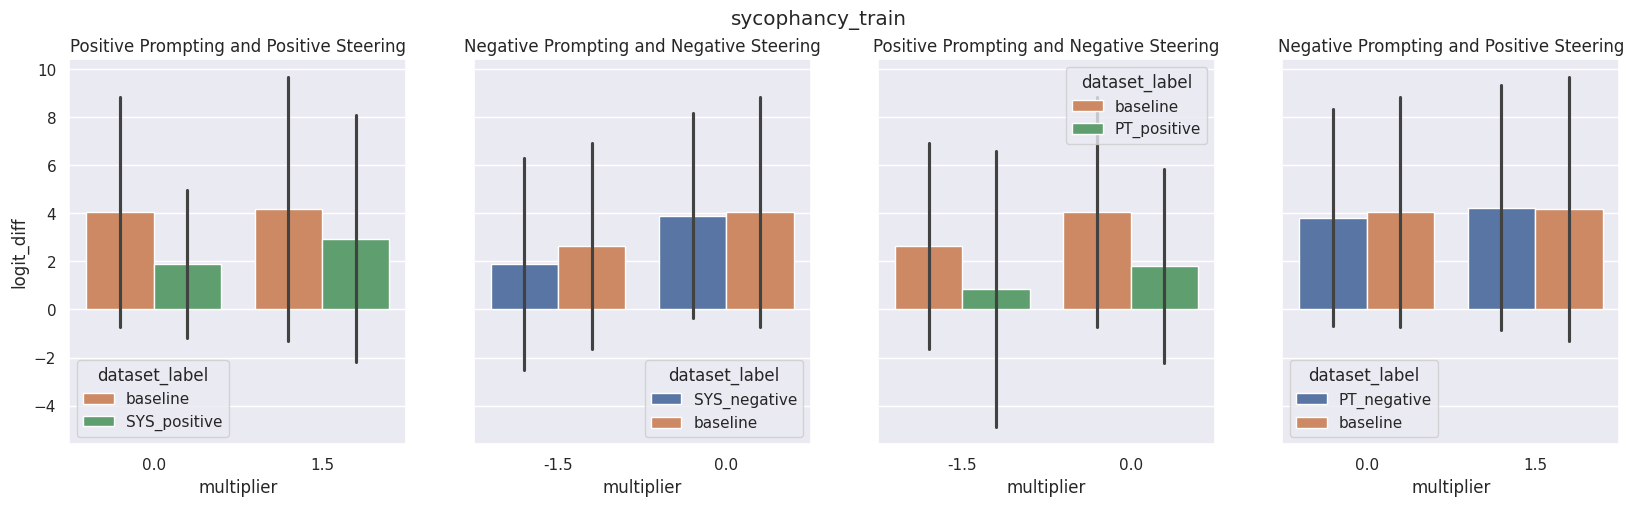

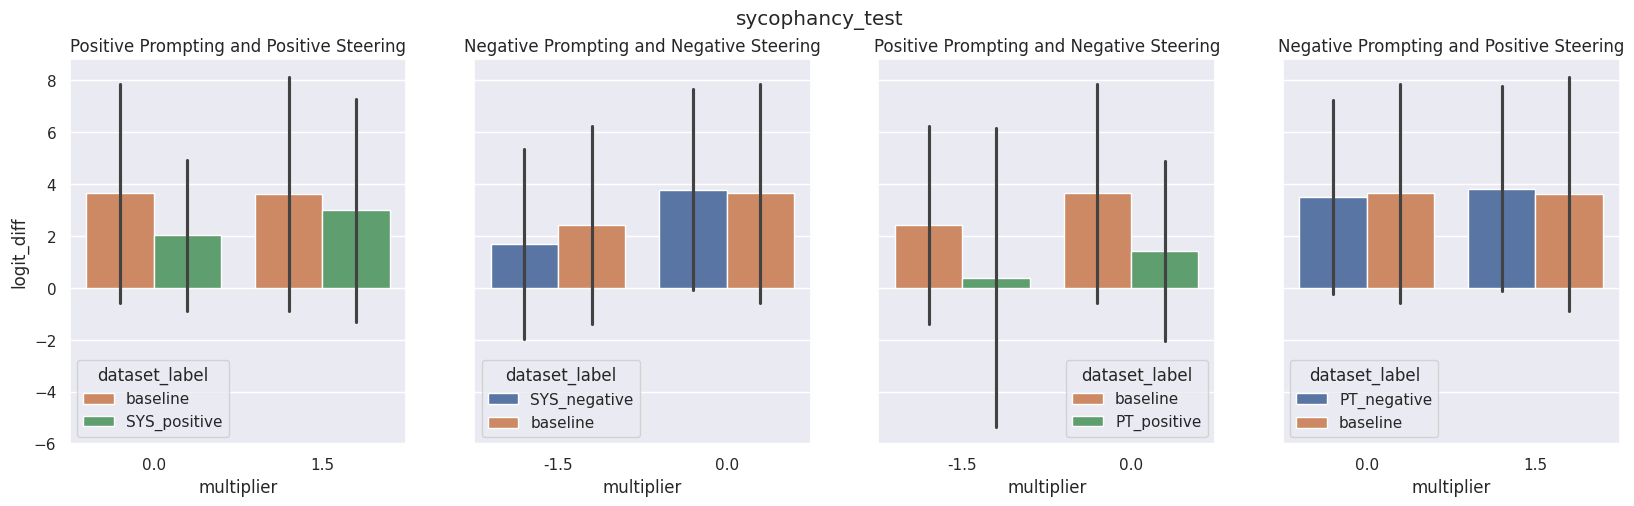

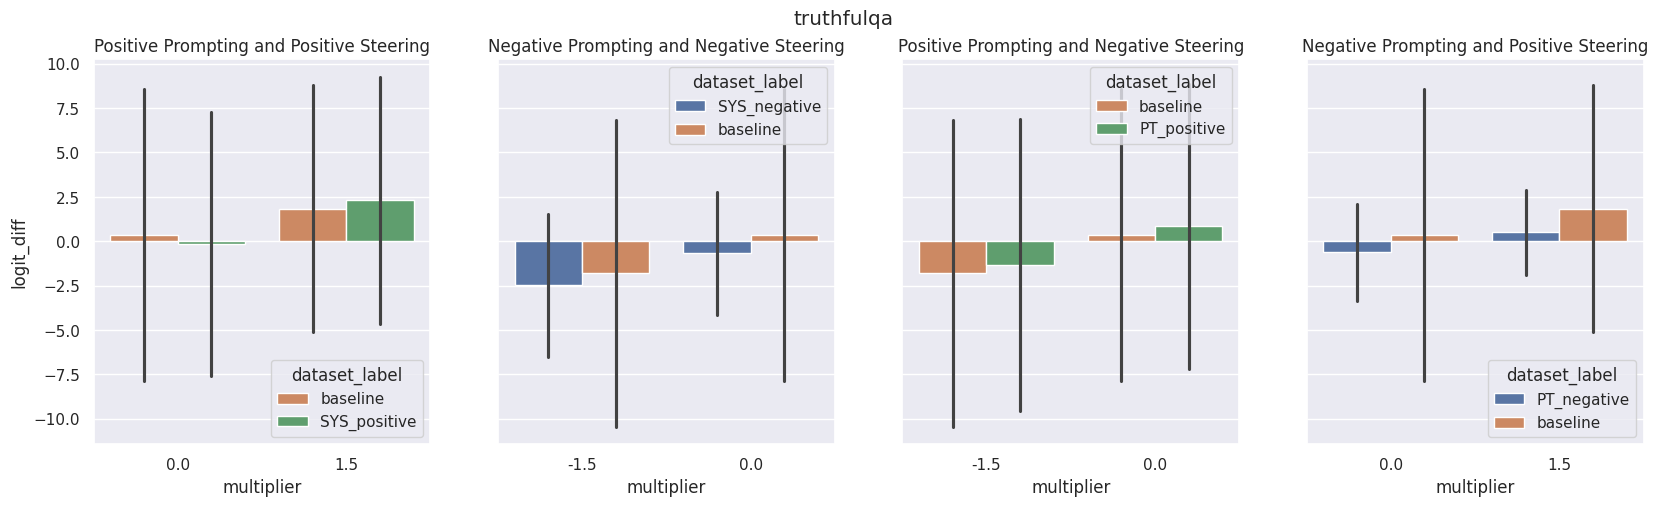

In [45]:
def make_plots_for_dataset(df, dataset_name):

    df = df[df.dataset_name == dataset_name]
    fig, ax = plt.subplots(nrows=  1, ncols = 4, sharey=True, figsize=(20,5))
    plot_df = df[
        (df.steering_label == 'baseline') 
        & (df.dataset_label.isin(['SYS_positive', 'baseline']))
        & (df.multiplier.isin([0.0, 1.5]))
    ]

    g = sns.barplot(
        plot_df, 
        # dodge=True,
        y = 'logit_diff',
        hue = 'dataset_label',
        x = 'multiplier',
        errorbar = 'sd',
        ax = ax[0],
        # order = plot_df['order'],
        palette = sns.color_palette()[1:]
    )
    ax[0].set_title("Positive Prompting and Positive Steering")



    plot_df = df[
        (df.steering_label == 'baseline') 
        & (df.dataset_label.isin(['SYS_negative', 'baseline']))
        & (df.multiplier.isin([0.0, -1.5]))
    ]
    g = sns.barplot(
        plot_df, 
        # dodge=True,
        y = 'logit_diff',
        hue = 'dataset_label',
        x = 'multiplier',
        errorbar = 'sd',
        ax = ax[1],
        # order = plot_df['order'] 
        hue_order = ['SYS_negative', 'baseline']
    )
    ax[1].set_title("Negative Prompting and Negative Steering")



    plot_df = df[
        (df.steering_label == 'baseline') 
        & (df.dataset_label.isin(['PT_positive', 'baseline']))
        & (df.multiplier.isin([0.0, -1.5]))
    ]
    # fig, ax= plt.subplots()
    g = sns.barplot(
        plot_df, 
        # dodge=True,
        y = 'logit_diff',
        hue = 'dataset_label',
        x = 'multiplier',
        errorbar = 'sd',
        ax = ax[2],
        palette = sns.color_palette()[1:]
    )
    ax[2].set_title("Positive Prompting and Negative Steering")


    plot_df = df[
        (df.steering_label == 'baseline') 
        & (df.dataset_label.isin(['PT_negative', 'baseline']))
        & (df.multiplier.isin([0.0, 1.5]))
    ]
    # fig, ax= plt.subplots()
    g = sns.barplot(
        plot_df, 
        # dodge=True,
        y = 'logit_diff',
        hue = 'dataset_label',
        x = 'multiplier',
        errorbar = 'sd',
        ax = ax[3],
        hue_order = ['PT_negative', 'baseline']
    )
    ax[3].set_title("Negative Prompting and Positive Steering")
    fig.suptitle(dataset_name)

for dataset_name in dataset_names:
    make_plots_for_dataset(df, dataset_name)